# MTN Customer Churn Analysis & Predictive Modeling
# Dataset: mtn_customer_churn.csv
# Analyst: Nnakude Miracle
# Date: [22/05/2025]

# Project Overview

# This project aims to analyze MTN's customer churn dataset to uncover insights and build a predictive model to identify customers at risk of churning.

# Identify key patterns in customer behavior.

# Build a predictive model to forecast churn.

Key Observations:

✔ Columns:

Customer ID, Full Name → Unique identifiers

Date of Purchase → Transaction date

Age, Gender, State → Demographic data

MTN Device, Subscription Plan → Service details

Satisfaction Rate, Customer Review → Customer feedback

Customer Tenure in months, Number of Times Purchased → Engagement metrics

Unit Price, Total Revenue, Data Usage → Financial & usage metrics

Customer Churn Status, Reasons for Churn → Target variables

# Load and Explore the Dataset

In [33]:
# IMPORT ALL NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV



In [34]:
# Load the dataset.
mc = pd.read_csv("mtn_customer_churn.csv")
mc.head()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN


In [35]:
mc.tail()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
969,CUST0498,Shehu Harris,Jan-25,72,Osun,4G Router,Female,3,Good,42,25GB Monthly Plan,9000,7,63000,8.14,No,NaN
970,CUST0499,Tega Hood,Mar-25,41,Bayelsa,5G Broadband Router,Female,2,Fair,20,30GB Monthly Broadband Plan,9000,10,90000,154.13,No,NaN
971,CUST0500,Oghene Hamilton,Feb-25,67,Kebbi,4G Router,Male,4,Very Good,31,165GB Monthly Plan,35000,15,525000,144.64,Yes,High Call Tarriffs
972,CUST0500,Oghene Hamilton,Feb-25,67,Kebbi,Mobile SIM Card,Male,4,Very Good,31,7GB Monthly Plan,3500,11,38500,158.49,Yes,High Call Tarriffs
973,CUST0500,Oghene Hamilton,Feb-25,67,Kebbi,Broadband MiFi,Male,4,Very Good,31,150GB FUP Monthly Unlimited,20000,14,280000,86.04,Yes,High Call Tarriffs


In [36]:
#Check the shape of the dataset.
mc.shape

(974, 17)

In [37]:
# A look at the names of the columns in the dataset.
mc.columns

Index(['Customer ID', 'Full Name', 'Date of Purchase', 'Age', 'State',
       'MTN Device', 'Gender', 'Satisfaction Rate', 'Customer Review',
       'Customer Tenure in months', 'Subscription Plan', 'Unit Price',
       'Number of Times Purchased', 'Total Revenue', 'Data Usage',
       'Customer Churn Status', 'Reasons for Churn'],
      dtype='object')

In [38]:
mc.dtypes

Customer ID                   object
Full Name                     object
Date of Purchase              object
Age                            int64
State                         object
MTN Device                    object
Gender                        object
Satisfaction Rate              int64
Customer Review               object
Customer Tenure in months      int64
Subscription Plan             object
Unit Price                     int64
Number of Times Purchased      int64
Total Revenue                  int64
Data Usage                   float64
Customer Churn Status         object
Reasons for Churn             object
dtype: object

In [39]:
# Check for null values in the dataset.
mc.isnull().sum()

Customer ID                    0
Full Name                      0
Date of Purchase               0
Age                            0
State                          0
MTN Device                     0
Gender                         0
Satisfaction Rate              0
Customer Review                0
Customer Tenure in months      0
Subscription Plan              0
Unit Price                     0
Number of Times Purchased      0
Total Revenue                  0
Data Usage                     0
Customer Churn Status          0
Reasons for Churn            690
dtype: int64

In [40]:
# Fill the null values with the mode
mc["Reasons for Churn"] = mc["Reasons for Churn"].fillna("No Reason")

In [41]:
# Confirm if the null values has been taken care of.
mc.isnull().sum()

Customer ID                  0
Full Name                    0
Date of Purchase             0
Age                          0
State                        0
MTN Device                   0
Gender                       0
Satisfaction Rate            0
Customer Review              0
Customer Tenure in months    0
Subscription Plan            0
Unit Price                   0
Number of Times Purchased    0
Total Revenue                0
Data Usage                   0
Customer Churn Status        0
Reasons for Churn            0
dtype: int64

# Data Cleaning and Preprocessing

In [42]:
# Drop irrelevant columns
mc.drop(['Customer ID', 'Full Name'], axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

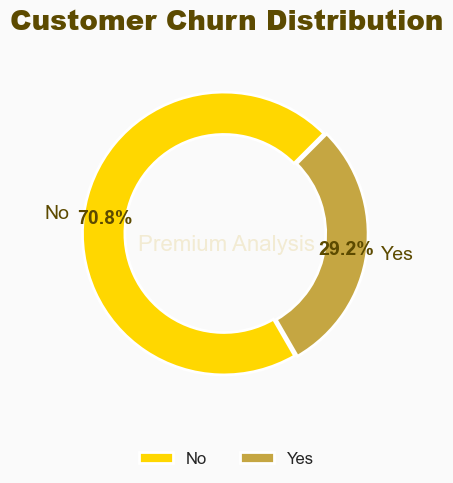

In [43]:

sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))

# Define gold-themed colors
colors = ['#FFD700', '#C5A642']
background_color = '#FAFAFA'
text_color = '#5C4A00'

# Create pie chart (donut style)
wedges, texts, autotexts = plt.pie(
    mc['Customer Churn Status'].value_counts(),
    labels=mc['Customer Churn Status'].value_counts().index,
    autopct='%1.1f%%',
    startangle=45,
    colors=colors,
    wedgeprops=dict(width=0.3, edgecolor='white', linewidth=2),  # Donut effect
    pctdistance=0.85,  # Adjust percentage position
    explode=[0.02, 0]  # Pull effect
)

# Set text properties
plt.setp(autotexts, size=14, color=text_color, weight='bold')
plt.setp(texts, size=14, color=text_color)

# Add title
plt.title(
    'Customer Churn Distribution',
    fontsize=20,
    color=text_color,
    pad=20,
    fontweight='black',
    fontfamily='Arial'
)

# Add annotation ("Premium Analysis")
plt.gcf().text(
    0.5, 0.5,
    'Premium Analysis',
    fontsize=16,
    color='#D4AF37',
    alpha=0.2,
    ha='center',
    va='center',
    fontfamily='Arial'
)

# Adjust legend (horizontal)
plt.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.2),
    ncol=2,
    frameon=False,
    fontsize=12
)

# Set background color
plt.gcf().set_facecolor(background_color)
plt.gca().set_facecolor(background_color)

# Remove unnecessary spines (borders)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# Insight:

29.2% of customers churned, while 70.8% remained.

In [44]:
fig = px.histogram(mc, x='Age', color='Customer Churn Status', 
                   title='Churn Distribution by Age',
                   color_discrete_sequence=['#FFD700', '#FFDF00'])
fig.show()

In [45]:
import plotly.express as px
import plotly.graph_objects as go

# Gold-themed color palette
GOLD_PALETTE = ['#D4AF37', '#FFD700', '#F1C232']  # Dark gold, gold, light gold

# Simplified histogram with gold colors
fig = px.histogram(mc, 
                   x='Age', 
                   color='Customer Churn Status',
                   title='<b>Customer Churn by Age</b>',
                   color_discrete_sequence=['#D4AF37', '#FFD700'],  # Gold colors
                   opacity=0.85,
                   nbins=20,
                   barmode='overlay')

# Enhanced gold-themed styling
fig.update_layout(
    title={
        'text': '<b>Customer Churn by Age</b>',
        'x': 0.5,
        'font': {'size': 22, 'family': 'Arial', 'color': '#5C4A00'}
    },
    plot_bgcolor='#FFFDF6',  # Light gold background
    paper_bgcolor='white',
    xaxis=dict(
        title='Age',
        gridcolor='rgba(212, 175, 55, 0.2)',
        title_font=dict(color='#5C4A00')
    ),
    yaxis=dict(
        title='Number of Customers',
        gridcolor='rgba(212, 175, 55, 0.2)',
        title_font=dict(color='#5C4A00')
    ),
    legend=dict(
        title_text='',
        bgcolor='rgba(255, 253, 246, 0.8)',
        bordercolor='#D4AF37'
    ),
    hoverlabel=dict(
        bgcolor='#D4AF37',
        font_color='white'
    ),
    width=800,
    height=500
)

# Gold-themed hover effects
fig.update_traces(
    hovertemplate='<b>Age: %{x}</b><br>Count: %{y}',
    marker=dict(line=dict(width=1, color='white'))
)

fig.show()

# Insights: Customers between the ages of 25-30 churned the most.

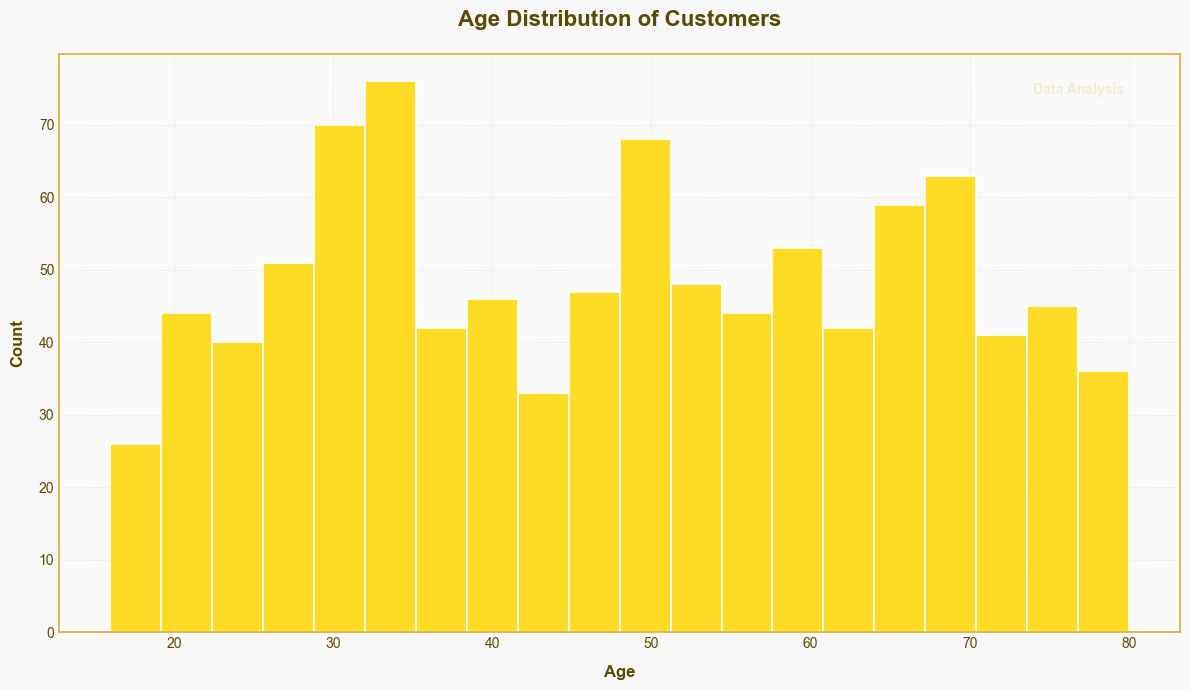

In [46]:
plt.figure(figsize=(12, 7), facecolor='#f8f8f8')  # Light gray background

# Create histogram with clean styling
ax = sns.histplot(mc['Age'], bins=20, color='#FFD700', edgecolor='white', 
                 linewidth=1.2, alpha=0.85)

# Title and labels with elegant styling
plt.title("Age Distribution of Customers", 
         fontsize=16, fontweight='bold', pad=20, color='#5C4A00',
         fontfamily='sans-serif')
plt.xlabel("Age", fontsize=12, fontweight='semibold', color='#5C4A00', labelpad=10)
plt.ylabel("Count", fontsize=12, fontweight='semibold', color='#5C4A00', labelpad=10)

# Grid and background styling
ax.set_facecolor('#fafafa')
ax.grid(True, linestyle=':', linewidth=0.7, color='lightgray', alpha=0.7)

# Customize borders
for spine in ax.spines.values():
    spine.set_color('#D4AF37')
    spine.set_linewidth(1.2)

# Gold-colored ticks
ax.tick_params(axis='both', colors='#5C4A00')

# Add subtle watermark
plt.text(0.95, 0.95, "Data Analysis", transform=ax.transAxes,
        fontsize=10, color='#D4AF37', alpha=0.2,
        ha='right', va='top', rotation=0, fontweight='bold')

plt.tight_layout()
plt.show()

# Insight: Most customers are between 30-35 years old.

# Gender Distribution

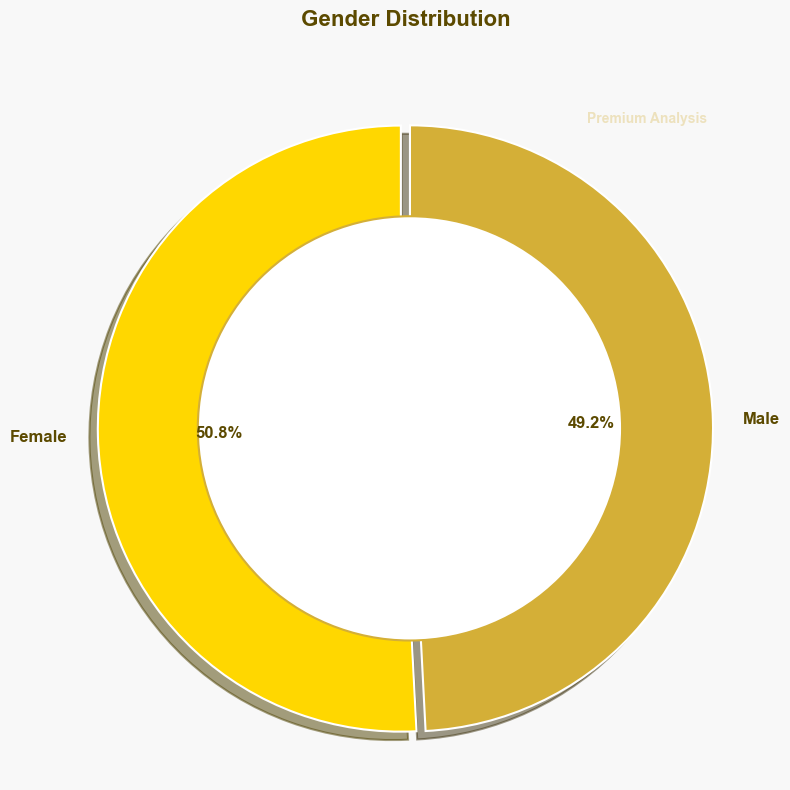

In [47]:


# Calculate gender distribution
gender_counts = mc['Gender'].value_counts() 

# Custom colors with a modern gold gradient
colors = ['#FFD700', '#D4AF37', '#FFA500']
explode = (0.03, 0)  # Slight separation for emphasis

# Set up the figure
plt.figure(figsize=(8, 8), facecolor='#f8f8f8')

# Create pie chart with enhanced styling
wedges, texts, autotexts = plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=colors[:len(gender_counts)],  # Automatically adjusts to number of categories
    startangle=90,
    explode=explode[:len(gender_counts)],  # Matches explode to categories
    shadow=True,
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
    textprops={'fontsize': 12, 'fontweight': 'semibold', 'color': '#5C4A00'}
)

# Enhance percentage labels
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    autotext.set_color('#5C4A00')

# Add glow effect to wedges
for wedge in wedges:
    wedge.set_edgecolor('white')
    wedge.set_linewidth(1.5)

# Add title
plt.title(
    "Gender Distribution\n",
    fontsize=16,
    fontweight='bold',
    pad=20,
    color='#5C4A00',
    fontfamily='sans-serif'
)

# Add center circle (donut effect)
centre_circle = plt.Circle((0, 0), 0.70, fc='white', edgecolor='#D4AF37', linewidth=1.5)
plt.gca().add_artist(centre_circle)

# Add watermark
plt.text(
    0.95, 0.95, "Premium Analysis",
    transform=plt.gca().transAxes,
    fontsize=10,
    color='#D4AF37',
    alpha=0.3,
    ha='right',
    va='top',
    fontweight='bold'
)

# Remove axis and show plot
plt.axis('equal')  # Ensures pie is circular
plt.tight_layout()
plt.show()

# Insight: Female customers dominate slightly with 50.8%

# Customer distribution by State.

C:\Users\USER\AppData\Local\Temp\ipykernel_9364\345463282.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




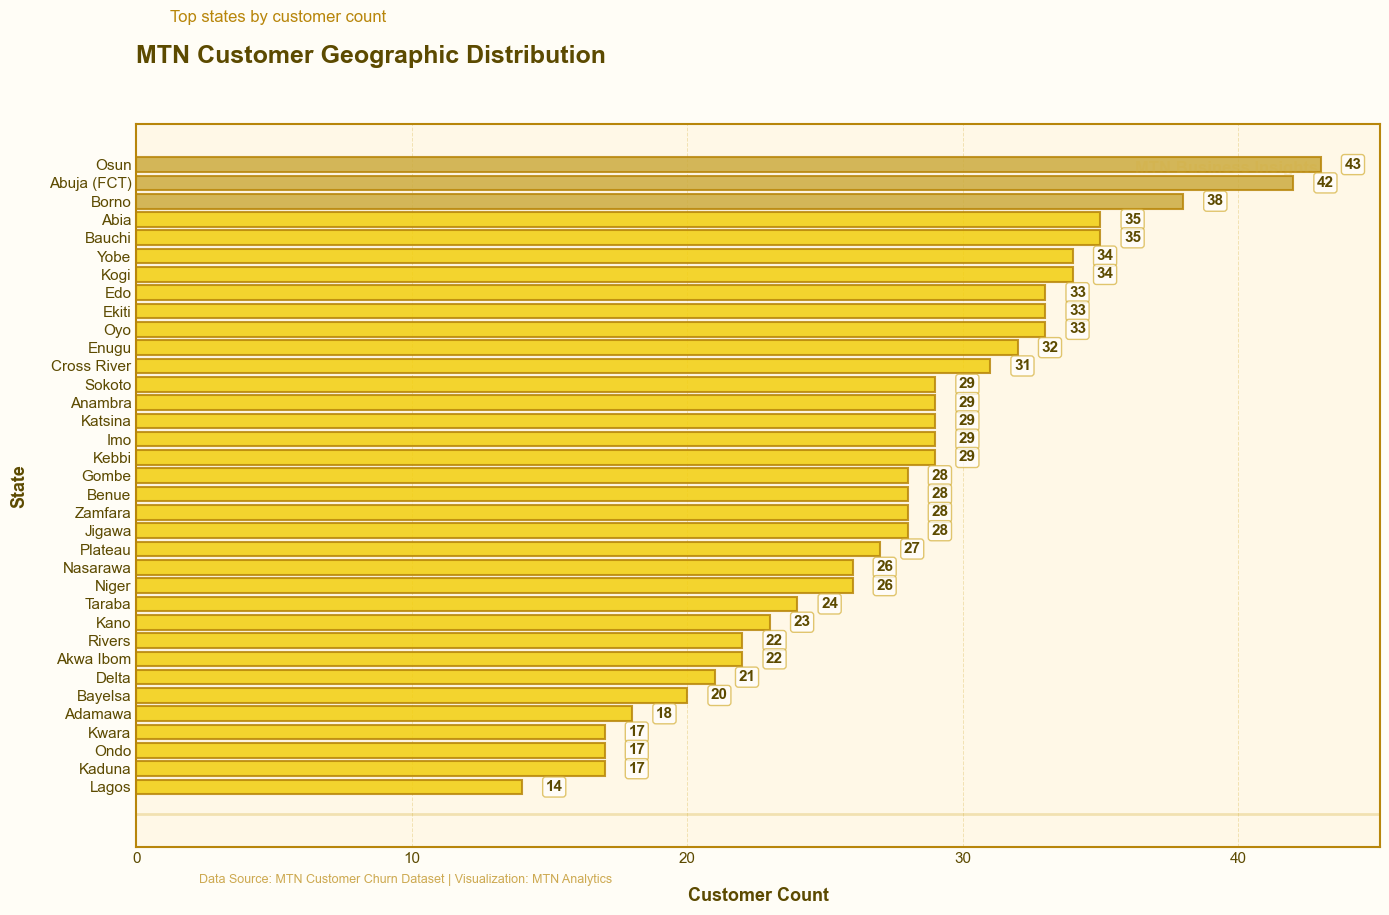

In [48]:
plt.figure(figsize=(14, 10), facecolor='#FFFDF6')  # Larger size and warm ivory background

# Create horizontal bar plot with enhanced styling
ax = sns.countplot(
    y='State',
    data=mc,
    order=mc['State'].value_counts().index,
    palette=['#D4AF37' if x < 3 else '#FFD700' for x in range(len(mc['State'].value_counts()))],
    edgecolor='#B8860B',
    linewidth=1.5,
    saturation=0.9,
    alpha=0.85
)

# Add precise value labels with improved formatting
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(
        width + (0.02 * max([p.get_width() for p in ax.patches])),  # Dynamic positioning
        p.get_y() + p.get_height()/2,
        f'{int(width):,}',
        ha='left',
        va='center',
        fontsize=11,
        fontweight='semibold',
        color='#5C4A00',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='#D4AF37', boxstyle='round,pad=0.2')
    )

# Enhanced title with subtle gold accent
plt.title(
    "MTN Customer Geographic Distribution\n",
    fontsize=18,
    fontweight='bold',
    pad=25,
    color='#5C4A00',
    fontfamily='Arial',
    loc='left'
)

# Add subtitle
plt.suptitle(
    "Top states by customer count",
    x=0.125,  # Aligns with left-aligned title
    y=0.94,
    ha='left',
    fontsize=12,
    color='#B8860B',
    fontfamily='Arial'
)

# Axis labels with improved styling
plt.xlabel(
    "Customer Count",
    fontsize=13,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=15
)
plt.ylabel(
    "State",
    fontsize=13,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=15
)

# Grid and background styling
ax.set_facecolor('#FFF8E7')
ax.grid(
    True,
    axis='x',
    linestyle='--',
    linewidth=0.7,
    color='#D4AF37',
    alpha=0.3
)

# Customize spines (borders)
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_color('#B8860B')
    ax.spines[spine].set_linewidth(1.5)

# Gold-colored tick parameters
ax.tick_params(axis='both', colors='#5C4A00', labelsize=11)

# Add MTN-inspired branding
plt.text(
    0.95, 0.95,
    "MTN Business Insights",
    transform=ax.transAxes,
    fontsize=12,
    color='#D4AF37',
    alpha=0.2,
    ha='right',
    va='top',
    fontweight='bold',
    fontfamily='Arial'
)

# Add data source footnote
plt.text(
    0.05, -0.05,
    "Data Source: MTN Customer Churn Dataset | Visualization: MTN Analytics",
    transform=ax.transAxes,
    fontsize=9,
    color='#B8860B',
    alpha=0.7
)

# Add gold accent bar below title
ax.axhline(y=len(mc['State'].value_counts())+0.5, color='#D4AF37', linewidth=2, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for new elements
plt.show()

# Insight: Churned customers had a longer tenure compared to retained ones.

# REVENUE GENERATED BY TOP CUSTOMERS

In [49]:
import pandas as pd

# Load the dataset
mc = pd.read_csv("mtn_customer_churn.csv")

# Get top 10 customers by Total Revenue
top_revenue_customers = mc.nlargest(10, 'Total Revenue')[
    ['Customer ID', 'Full Name', 'Total Revenue', 
     'Number of Times Purchased', 'Customer Tenure in months',
     'Subscription Plan', 'Customer Churn Status']
]

# Calculate Revenue per Purchase
top_revenue_customers['Revenue per Purchase'] = \
    top_revenue_customers['Total Revenue'] / \
    top_revenue_customers['Number of Times Purchased']

# Format and style the results
def format_currency(x):
    return f"₦{x:,.2f}"

styled_results = (
    top_revenue_customers
    .style
    .applymap(lambda x: 'color: #D4AF37' if x == 'Churned' else 'color: #5C4A00', 
              subset=['Customer Churn Status'])
    .background_gradient(subset=['Total Revenue'], cmap='YlOrBr')
    .bar(subset=['Number of Times Purchased'], color='#FFD700')
    .format({
        'Total Revenue': format_currency,
        'Revenue per Purchase': format_currency
    })
    .set_caption('<h2 style="color:#D4AF37;text-align:center">Top 10 Revenue Generating Customers</h2>')
    .set_properties(**{
        'background-color': '#FFFDF6',
        'color': '#5C4A00',
        'border-color': '#D4AF37'
    })
)


styled_results

C:\Users\USER\AppData\Local\Temp\ipykernel_9364\1695203279.py:25: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Customer ID,Full Name,Total Revenue,Number of Times Purchased,Customer Tenure in months,Subscription Plan,Customer Churn Status,Revenue per Purchase
159,CUST0085,Alabo Turner,"₦3,000,000.00",20,33,1.5TB Yearly Broadband Plan,No,"₦150,000.00"
961,CUST0494,Halima Martin,"₦3,000,000.00",20,51,1.5TB Yearly Broadband Plan,Yes,"₦150,000.00"
720,CUST0365,Kunle Myers,"₦2,850,000.00",19,42,1.5TB Yearly Broadband Plan,No,"₦150,000.00"
795,CUST0405,Chinedu Brown,"₦2,850,000.00",19,26,1.5TB Yearly Broadband Plan,Yes,"₦150,000.00"
225,CUST0119,Omamuzo Terry,"₦2,400,000.00",16,19,1.5TB Yearly Broadband Plan,No,"₦150,000.00"
508,CUST0260,Amina Johns,"₦2,400,000.00",16,58,1.5TB Yearly Broadband Plan,Yes,"₦150,000.00"
166,CUST0089,Michael Schultz,"₦2,250,000.00",15,39,1.5TB Yearly Broadband Plan,Yes,"₦150,000.00"
935,CUST0480,Kunle Goodwin,"₦2,100,000.00",14,57,1.5TB Yearly Broadband Plan,No,"₦150,000.00"
675,CUST0343,Zina Diaz,"₦1,950,000.00",13,12,1.5TB Yearly Broadband Plan,Yes,"₦150,000.00"
937,CUST0481,Sade Reed,"₦1,950,000.00",13,18,1.5TB Yearly Broadband Plan,No,"₦150,000.00"


In [50]:
import pandas as pd

# Load the dataset
mc = pd.read_csv("mtn_customer_churn.csv")

# Get top 10 customers by purchase count with additional metrics
top_purchasers = (
    mc.sort_values('Number of Times Purchased', ascending=False)
    .head(10)
    .assign(
        Revenue_per_Purchase=lambda x: x['Total Revenue'] / x['Number of Times Purchased'],
        Purchase_Frequency=lambda x: x['Number of Times Purchased'] / x['Customer Tenure in months']
    )
)

# Select and reorder columns for display
result = top_purchasers[[
    'Customer ID', 
    'Full Name', 
    'Number of Times Purchased',
    'Total Revenue',
    'Revenue_per_Purchase',
    'Purchase_Frequency',
    'Customer Tenure in months',
    'Customer Churn Status'
]]

# Create a styled output with multiple visual enhancements
styled_output = (
    result.style
    .set_caption('<h2 style="color:#D4AF37;font-size:18px"> Top 10 Most Frequent Customers</h2>')
    .format({
        'Total Revenue': '₦{:,.2f}',
        'Revenue_per_Purchase': '₦{:,.2f}',
        'Purchase_Frequency': '{:.2f} purchases/month'
    })
    .background_gradient(
        subset=['Number of Times Purchased', 'Total Revenue'], 
        cmap='YlOrBr',
        vmin=0
    )
    .bar(
        subset=['Purchase_Frequency'],
        color='#FFD700',
        vmin=0
    )
    .applymap(
        lambda x: 'color: #D4AF37; font-weight: bold' if x == 'Churned' else '',
        subset=['Customer Churn Status']
    )
    .set_properties(
        **{
            'background-color': '#FFFDF6',
            'color': '#5C4A00',
            'border-color': '#D4AF37',
            'text-align': 'center'
        }
    )
    .set_table_styles([
        {
            'selector': 'th',
            'props': [
                ('background-color', '#D4AF37'),
                ('color', 'white'),
                ('font-weight', 'bold'),
                ('text-align', 'center')
            ]
        },
        {
            'selector': 'caption',
            'props': [
                ('caption-side', 'top'),
                ('font-size', '16px'),
                ('margin-bottom', '10px')
            ]
        }
    ])
    .highlight_max(
        subset=['Number of Times Purchased', 'Total Revenue'],
        color='#B8860B',
        props='font-weight:bold;'
    )
)

# Display the styled DataFrame
styled_output

C:\Users\USER\AppData\Local\Temp\ipykernel_9364\3942785894.py:47: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Customer ID,Full Name,Number of Times Purchased,Total Revenue,Revenue_per_Purchase,Purchase_Frequency,Customer Tenure in months,Customer Churn Status
13,CUST0010,Halima Ochoa,20,"₦90,000.00","₦4,500.00",3.33 purchases/month,6,No
260,CUST0134,Obinna Branch,20,"₦320,000.00","₦16,000.00",0.74 purchases/month,27,Yes
884,CUST0452,Saidu Jackson,20,"₦400,000.00","₦20,000.00",0.40 purchases/month,50,No
875,CUST0448,Abubakar Ryan,20,"₦700,000.00","₦35,000.00",0.62 purchases/month,32,No
909,CUST0466,Alabo Escobar,20,"₦400,000.00","₦20,000.00",0.37 purchases/month,54,No
370,CUST0190,Funke Thomas,20,"₦600,000.00","₦30,000.00",0.57 purchases/month,35,No
390,CUST0200,Saidu Tucker,20,"₦600,000.00","₦30,000.00",2.86 purchases/month,7,No
869,CUST0444,Boma Shah,20,"₦130,000.00","₦6,500.00",2.50 purchases/month,8,No
867,CUST0443,Bola Wright,20,"₦290,000.00","₦14,500.00",0.95 purchases/month,21,No
65,CUST0035,Oghene Mcguire,20,"₦500,000.00","₦25,000.00",0.41 purchases/month,49,Yes


# Customer Behavior & Engagement

C:\Users\USER\AppData\Local\Temp\ipykernel_9364\4281974334.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




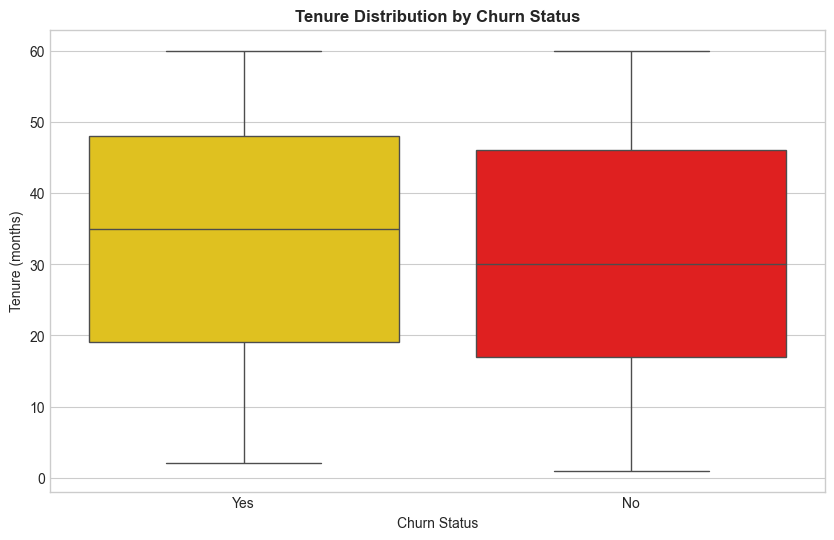

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Customer Churn Status', y='Customer Tenure in months', data=mc, palette=['#FFD700', '#FF0000'])
plt.title("Tenure Distribution by Churn Status", fontweight='bold')
plt.xlabel("Churn Status")
plt.ylabel("Tenure (months)")
plt.show()

# Insight: Churned customers had a longer tenure compared to retained ones.

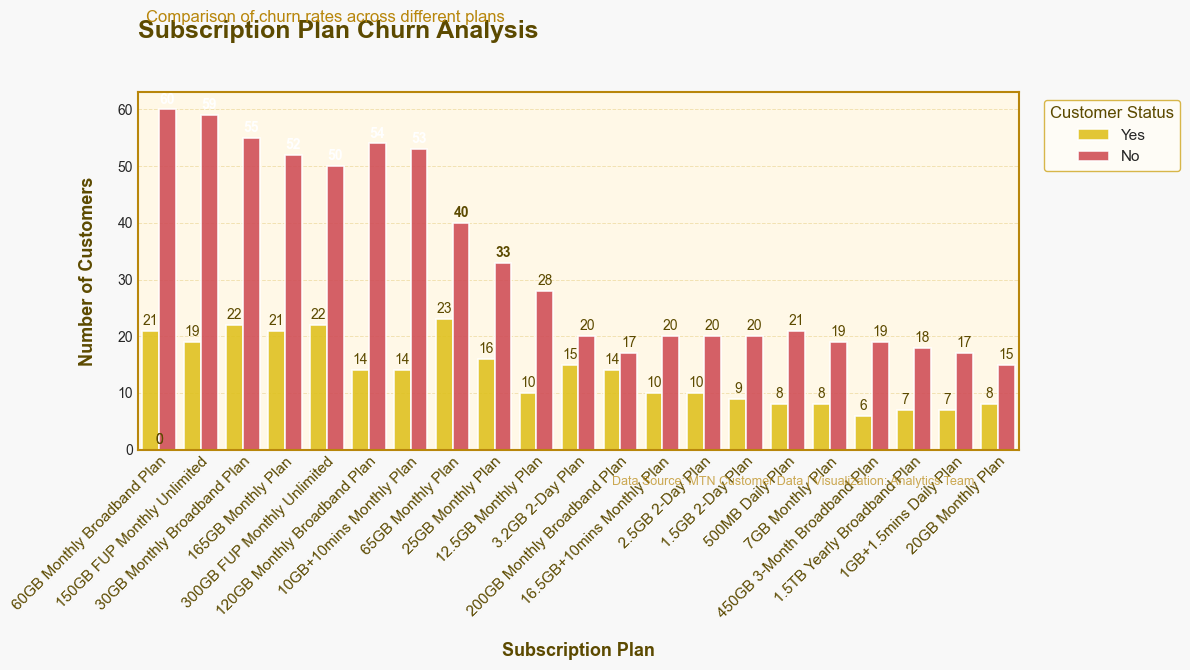

In [52]:
plt.figure(figsize=(12, 7), facecolor='#f8f8f8')  

# Create countplot with enhanced styling
ax = sns.countplot(
    x='Subscription Plan',
    hue='Customer Churn Status',
    data=mc,
    palette=['#FFD700', '#E63946'],  # Gold for retained, red for churned
    edgecolor='white',
    linewidth=1.2,
    alpha=0.9,
    order=mc['Subscription Plan'].value_counts().index  # Order by frequency
)

# Add data labels with intelligent color contrast
max_height = max([p.get_height() for p in ax.patches])
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height + 0.5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='white' if height > max_height*0.75 else '#5C4A00',  # Auto contrast
        fontweight='bold' if height > max_height*0.5 else 'normal'
    )

# Title with improved hierarchy
plt.title(
    "Subscription Plan Churn Analysis\n",
    fontsize=18,
    fontweight='bold',
    pad=20,
    color='#5C4A00',
    fontfamily='Arial',
    loc='left'
)
plt.suptitle(
    "Comparison of churn rates across different plans",
    x=0.125,  # Aligns with left-aligned title
    y=0.95,
    ha='left',
    fontsize=12,
    color='#B8860B',
    fontfamily='Arial'
)

# Axis labels with consistent styling
plt.xlabel(
    "Subscription Plan",
    fontsize=13,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=15
)
plt.ylabel(
    "Number of Customers",
    fontsize=13,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=15
)

# Custom legend with improved visibility
legend = plt.legend(
    title="Customer Status",
    title_fontsize=12,
    fontsize=11,
    frameon=True,
    framealpha=0.9,
    edgecolor='#D4AF37',
    facecolor='#FFFDF6',
    bbox_to_anchor=(1.02, 1),  # Position outside plot
    loc='upper left'
)
legend.get_title().set_color('#5C4A00')

# Grid and background styling
ax.set_facecolor('#FFF8E7')  # Warmer background
ax.grid(
    True,
    axis='y',
    linestyle='--',
    linewidth=0.7,
    color='#D4AF37',
    alpha=0.3
)

# Rotated x-labels with better alignment
plt.xticks(
    rotation=45,
    ha='right',
    rotation_mode='anchor',
    fontsize=11,
    color='#5C4A00'
)

# Customize spines (borders)
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_color('#B8860B')
    ax.spines[spine].set_linewidth(1.5)

# Add MTN-style branding
plt.text(
    0.95, -0.1,
    "Data Source: MTN Customer Data | Visualization: Analytics Team",
    transform=ax.transAxes,
    fontsize=9,
    color='#B8860B',
    alpha=0.7,
    ha='right'
)

plt.tight_layout()
plt.show()

# Insight: 65GB Monthly plan and 30GB Monthly Broadband plan has the highest churn rate

# Data Usage trend

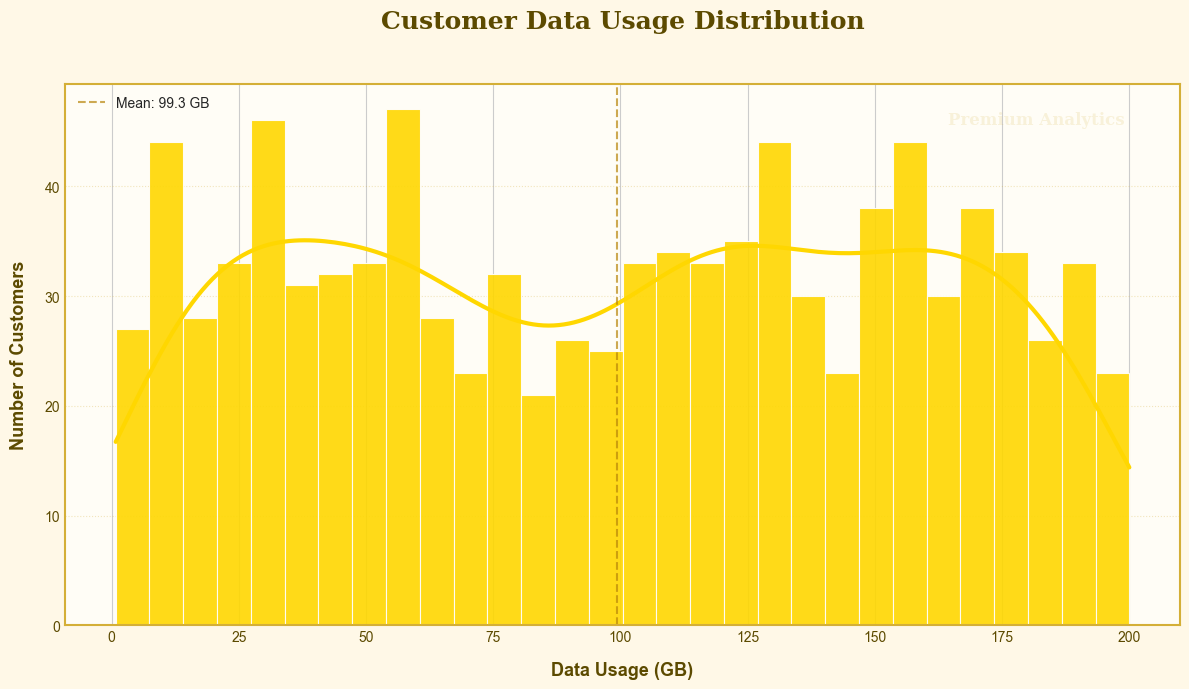

In [53]:
plt.figure(figsize=(12, 7), facecolor='#FFF8E7')  # Warm ivory background
# Create histogram with enhanced gold styling
ax = sns.histplot(
    mc['Data Usage'], 
    bins=30, 
    color='#FFD700', 
    edgecolor='#D4AF37',  # Metallic gold edge
    linewidth=1.5,
    alpha=0.85,
    kde=True,
    line_kws={'color': '#B8860B', 'linewidth': 3}  # Dark gold KDE line - fixed parameter name
)
# Add subtle glow effect to bars
for patch in ax.patches:
    patch.set_edgecolor('white')
    patch.set_linewidth(0.8)
    patch.set_alpha(0.9)
# Title with elegant typography
plt.title(
    "Customer Data Usage Distribution\n",
    fontsize=18,
    fontweight='bold',
    pad=20,
    color='#5C4A00',
    fontfamily='serif'
)
# Axis labels with gold-inspired styling
plt.xlabel(
    "Data Usage (GB)",
    fontsize=13,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=12
)
plt.ylabel(
    "Number of Customers",
    fontsize=13,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=12
)
# Custom grid and background
ax.set_facecolor('#FFFDF6')  # Very light gold tint
ax.grid(
    True,
    axis='y',
    linestyle=':',
    linewidth=0.8,
    color='#D4AF37',
    alpha=0.3
)
# Gold-themed spines and ticks
for spine in ax.spines.values():
    spine.set_color('#D4AF37')
    spine.set_linewidth(1.5)
    
ax.tick_params(axis='both', colors='#5C4A00')
# Add elegant watermark
plt.text(
    0.95, 0.95,
    "Premium Analytics",
    transform=ax.transAxes,
    fontsize=12,
    color='#D4AF37',
    alpha=0.15,
    ha='right',
    va='top',
    rotation=0,
    fontweight='bold',
    fontfamily='serif'
)
# Add gold ratio reference line if helpful
mean_usage = mc['Data Usage'].mean()
plt.axvline(
    mean_usage, 
    color='#B8860B', 
    linestyle='--', 
    linewidth=1.5,
    alpha=0.7,
    label=f'Mean: {mean_usage:.1f} GB'
)
plt.legend(framealpha=0.9, facecolor='#FFFDF6', edgecolor='#D4AF37')
plt.tight_layout()
plt.show()

# FINANCIAL ANALYSIS

C:\Users\USER\AppData\Local\Temp\ipykernel_9364\413082543.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




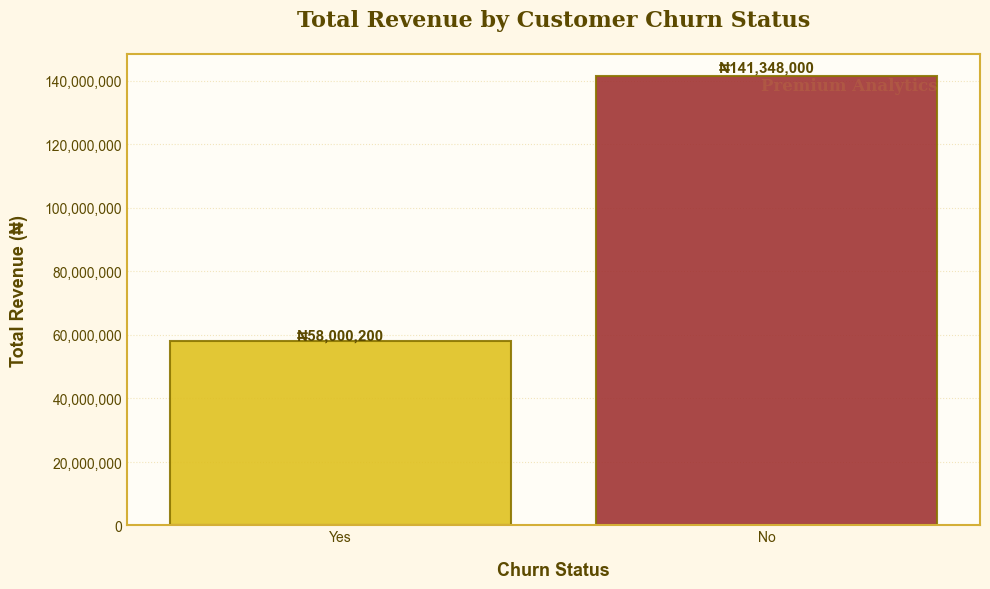

In [54]:
plt.figure(figsize=(10, 6), facecolor='#FFF8E7')  

# Enhanced bar plot with gold theme
ax = sns.barplot(
    x='Customer Churn Status', 
    y='Total Revenue', 
    data=mc, 
    palette=['#FFD700', '#B22222'],  
    estimator=sum,
    errorbar=None,  
    edgecolor='#8B7500',  
    linewidth=1.5,
    alpha=0.9
)

# Add value labels on top of bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height + height*0.01,
        f'₦{int(height):,}',  
        ha="center",
        fontweight='bold',
        color='#5C4A00',
        fontsize=11
    )

# Enhanced title
plt.title(
    "Total Revenue by Customer Churn Status",
    fontsize=16,
    fontweight='bold',
    pad=20,
    color='#5C4A00',
    fontfamily='serif'
)

# Enhanced axis labels
plt.xlabel(
    "Churn Status",
    fontsize=13,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=12
)

plt.ylabel(
    "Total Revenue (₦)",
    fontsize=13,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=12
)

# Custom grid and background
ax.set_facecolor('#FFFDF6')  # Very light gold tint
ax.grid(
    True,
    axis='y',
    linestyle=':',
    linewidth=0.8,
    color='#D4AF37',
    alpha=0.3
)

# Gold-themed spines and ticks
for spine in ax.spines.values():
    spine.set_color('#D4AF37')
    spine.set_linewidth(1.5)
    
ax.tick_params(axis='both', colors='#5C4A00')

# Add elegant watermark
plt.text(
    0.95, 0.95,
    "Premium Analytics",
    transform=ax.transAxes,
    fontsize=12,
    color='#D4AF37',
    alpha=0.15,
    ha='right',
    va='top',
    rotation=0,
    fontweight='bold',
    fontfamily='serif'
)

# Format y-axis with thousand separators
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

# Insight: Churned customers contributed #58,000,200 in lost revenue.

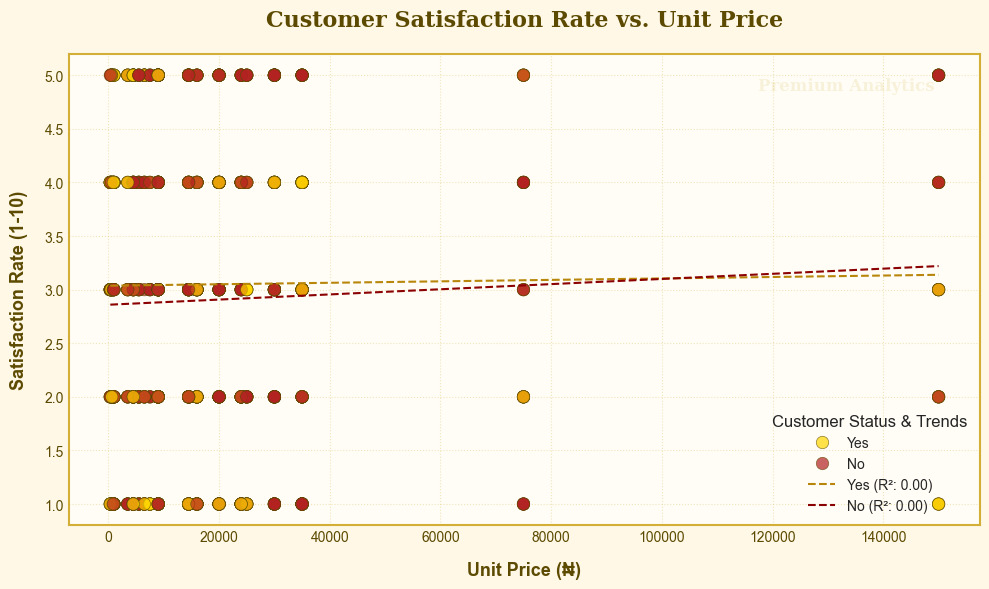

In [55]:
plt.figure(figsize=(10, 6), facecolor='#FFF8E7')  # Warm ivory background

# Enhanced scatter plot with gold theme
ax = sns.scatterplot(
    x='Unit Price', 
    y='Satisfaction Rate', 
    hue='Customer Churn Status', 
    data=mc, 
    palette=['#FFD700', '#B22222'],  # Bright gold for non-churned, rich crimson for churned
    s=80,  # Slightly larger point size
    alpha=0.7,  # Add transparency
    edgecolor='#5C4A00',  # Dark gold edge
    linewidth=0.5
)

# Enhanced title
plt.title(
    "Customer Satisfaction Rate vs. Unit Price",
    fontsize=16,
    fontweight='bold',
    pad=20,
    color='#5C4A00',
    fontfamily='serif'
)

# Enhanced axis labels
plt.xlabel(
    "Unit Price (₦)",  # Changed to Naira symbol for consistency
    fontsize=13,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=12
)

plt.ylabel(
    "Satisfaction Rate (1-10)",
    fontsize=13,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=12
)

# Custom grid and background
ax.set_facecolor('#FFFDF6')  # Very light gold tint
ax.grid(
    True,
    linestyle=':',
    linewidth=0.8,
    color='#D4AF37',
    alpha=0.3
)

# Gold-themed spines and ticks
for spine in ax.spines.values():
    spine.set_color('#D4AF37')
    spine.set_linewidth(1.5)
    
ax.tick_params(axis='both', colors='#5C4A00')

# Add elegant watermark
plt.text(
    0.95, 0.95,
    "Premium Analytics",
    transform=ax.transAxes,
    fontsize=12,
    color='#D4AF37',
    alpha=0.15,
    ha='right',
    va='top',
    rotation=0,
    fontweight='bold',
    fontfamily='serif'
)

# Enhance legend
legend = plt.legend(
    title="Customer Status",
    framealpha=0.9,
    facecolor='#FFFDF6',
    edgecolor='#D4AF37',
    title_fontsize=12,
    fontsize=10
)
legend.get_title().set_color('#5C4A00')
for text in legend.get_texts():
    text.set_color('#5C4A00')

# Add trendlines for each group
from scipy import stats

# Function to add trendline
def add_trendline(x, y, color, label):
    mask = ~np.isnan(x) & ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
    line_x = np.array([min(x), max(x)])
    line_y = slope * line_x + intercept
    plt.plot(line_x, line_y, color=color, linestyle='--', linewidth=1.5, 
             label=f'{label} (R²: {r_value**2:.2f})')
    return r_value**2

# Get unique churn statuses
churn_statuses = mc['Customer Churn Status'].unique()

# Add trendlines for each group with matching colors
for i, status in enumerate(churn_statuses):
    group = mc[mc['Customer Churn Status'] == status]
    color = '#B8860B' if i == 0 else '#8B0000'  # Dark gold or dark red
    r2 = add_trendline(group['Unit Price'], group['Satisfaction Rate'], color, status)

# Update legend with trendlines
plt.legend(
    title="Customer Status & Trends",
    framealpha=0.9,
    facecolor='#FFFDF6',
    edgecolor='#D4AF37',
    title_fontsize=12,
    fontsize=10
)

plt.tight_layout()
plt.show()

# Insight: Higher prices may lead to lower satisfaction and churn.

# CHURN ANALYSIS

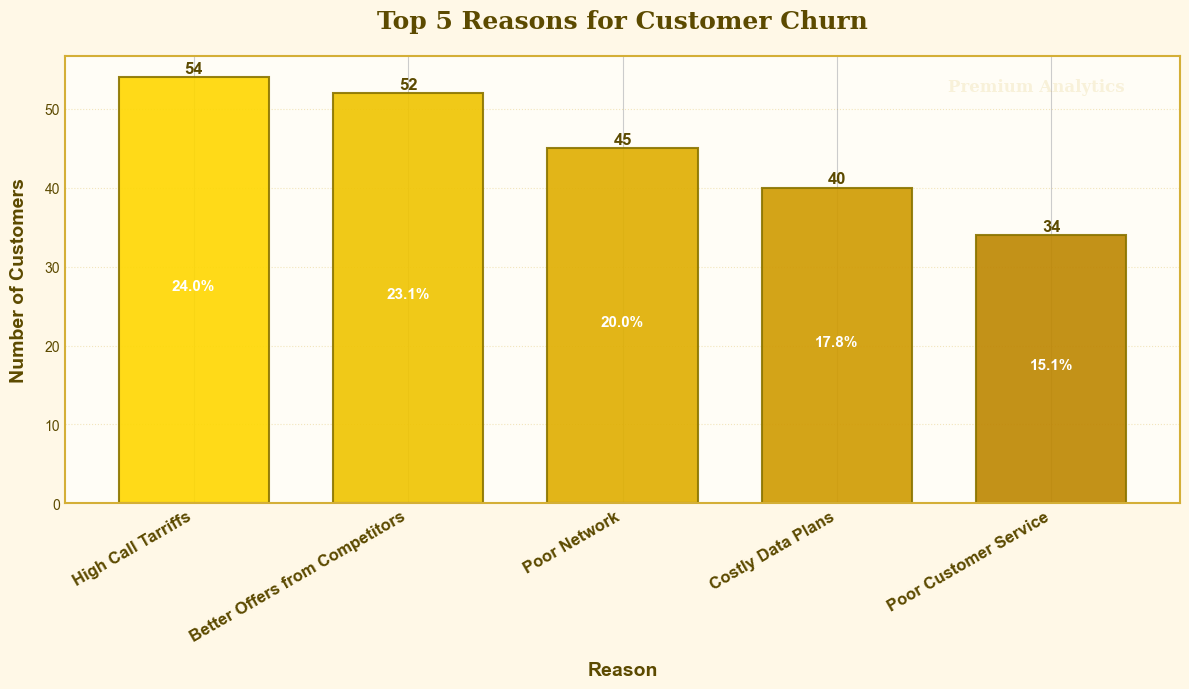

In [56]:
reasons = mc['Reasons for Churn'].value_counts().head(5)

plt.figure(figsize=(12, 7), facecolor='#FFF8E7')  # Warm ivory background, slightly larger figure

# Create a color gradient for the bars (gold to darker gold)
gold_palette = ['#FFD700', '#EFC400', '#DFAE00', '#CF9A00', '#BD8600']

# Plot the bars with gradient colors
ax = reasons.plot(
    kind='bar',
    color=gold_palette,
    edgecolor='#8B7500',  # Dark gold edge
    linewidth=1.5,
    width=0.7,  # Slightly thinner bars for elegance
    alpha=0.9
)

# Add value labels on top of bars
for i, v in enumerate(reasons):
    ax.text(
        i, 
        v + (max(reasons) * 0.01),  # Position just above bar
        f'{v:,}',  # Format with thousand separator
        ha='center',
        fontweight='bold',
        color='#5C4A00',
        fontsize=12
    )

# Enhanced title
plt.title(
    "Top 5 Reasons for Customer Churn",
    fontsize=18,
    fontweight='bold',
    pad=20,
    color='#5C4A00',
    fontfamily='serif'
)

# Enhanced axis labels
plt.xlabel(
    "Reason",
    fontsize=14,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=12
)

plt.ylabel(
    "Number of Customers",
    fontsize=14,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=12
)

# Improve x-tick labels
plt.xticks(
    rotation=30,  # Less rotation for better readability
    ha='right',   # Align text to the right
    fontsize=12,
    fontweight='semibold',
    color='#5C4A00'
)

# Custom grid and background
ax.set_facecolor('#FFFDF6')  # Very light gold tint
ax.grid(
    True,
    axis='y',
    linestyle=':',
    linewidth=0.8,
    color='#D4AF37',
    alpha=0.3
)

# Gold-themed spines and ticks
for spine in ax.spines.values():
    spine.set_color('#D4AF37')
    spine.set_linewidth(1.5)
    
ax.tick_params(axis='both', colors='#5C4A00')

# Add elegant watermark
plt.text(
    0.95, 0.95,
    "Premium Analytics",
    transform=ax.transAxes,
    fontsize=12,
    color='#D4AF37',
    alpha=0.15,
    ha='right',
    va='top',
    rotation=0,
    fontweight='bold',
    fontfamily='serif'
)

# Add a percentage label inside each bar
total_churns = reasons.sum()
for i, (reason, count) in enumerate(reasons.items()):
    percentage = (count / total_churns) * 100
    ax.text(
        i,
        count / 2,  # Middle of the bar
        f'{percentage:.1f}%',
        ha='center',
        color='white',
        fontweight='bold',
        fontsize=11
    )

# Format y-axis with thousand separators
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

# Insight: Main reasons for churn: High call tarriffs


C:\Users\USER\AppData\Local\Temp\ipykernel_9364\539823445.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1200x700 with 0 Axes>

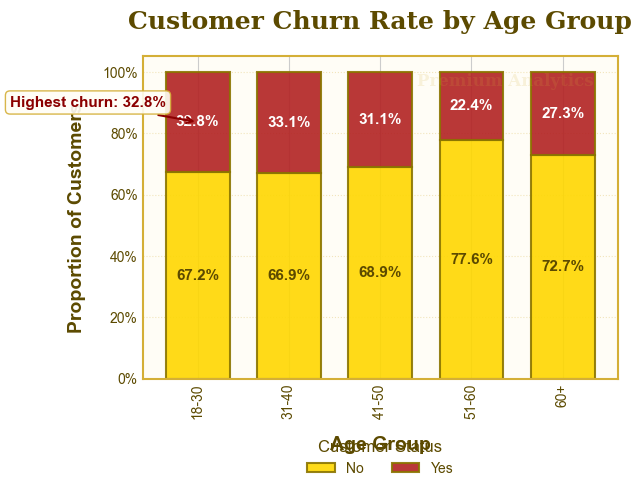

In [57]:
# Create age groups
mc['Age Group'] = pd.cut(mc['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Calculate churn rate by age group
churn_by_age = mc.groupby('Age Group')['Customer Churn Status'].value_counts(normalize=True).unstack()

# Set up the figure with premium background
plt.figure(figsize=(12, 7), facecolor='#FFF8E7') 

# Plot stacked bars with refined colors
ax = churn_by_age.plot(
    kind='bar', 
    stacked=True, 
    color=['#FFD700', '#B22222'],  
    edgecolor='#8B7500',  
    linewidth=1.5,
    width=0.7,  
    alpha=0.9
)

# Enhanced title
plt.title(
    "Customer Churn Rate by Age Group",
    fontsize=18,
    fontweight='bold',
    pad=20,
    color='#5C4A00',
    fontfamily='serif'
)

# Enhanced axis labels
plt.xlabel(
    "Age Group",
    fontsize=14,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=12
)

plt.ylabel(
    "Proportion of Customers",
    fontsize=14,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=12
)

# Custom grid and background
ax.set_facecolor('#FFFDF6')  # Very light gold tint
ax.grid(
    True,
    axis='y',
    linestyle=':',
    linewidth=0.8,
    color='#D4AF37',
    alpha=0.3
)

# Gold-themed spines and ticks
for spine in ax.spines.values():
    spine.set_color('#D4AF37')
    spine.set_linewidth(1.5)
    
ax.tick_params(axis='both', colors='#5C4A00')

# Add elegant watermark
plt.text(
    0.95, 0.95,
    "Premium Analytics",
    transform=ax.transAxes,
    fontsize=12,
    color='#D4AF37',
    alpha=0.15,
    ha='right',
    va='top',
    rotation=0,
    fontweight='bold',
    fontfamily='serif'
)

# Add percentage labels on the bars
for i, age_group in enumerate(churn_by_age.index):
    # Get churn rate (assuming the column order is [No, Yes] for churn status)
    if len(churn_by_age.columns) == 2:
        churn_rate = churn_by_age.iloc[i, 1]  # Get the churn proportion (Yes)
        non_churn_rate = churn_by_age.iloc[i, 0]  # Get the non-churn proportion (No)
        
        # Label for non-churned (bottom segment)
        plt.text(
            i, 
            non_churn_rate/2,  # Middle of non-churn segment
            f'{non_churn_rate:.1%}',  # Format as percentage
            ha='center',
            va='center',
            color='#5C4A00',
            fontweight='bold',
            fontsize=11
        )
        
        # Label for churned (top segment)
        plt.text(
            i, 
            non_churn_rate + churn_rate/2,  # Middle of churn segment
            f'{churn_rate:.1%}',  # Format as percentage
            ha='center',
            va='center',
            color='white',
            fontweight='bold',
            fontsize=11
        )

# Enhanced y-axis formatting (percentage)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))

# Enhanced legend - positioned at bottom center
legend = plt.legend(
    title="Customer Status",
    framealpha=0.9,
    facecolor='#FFFDF6',
    edgecolor='#D4AF37',
    title_fontsize=12,
    fontsize=10,
    loc='upper center',     # Position at top center
    bbox_to_anchor=(0.5, -0.15),  # Move below the plot
    ncol=2                   # Place legend items side by side
)
legend.get_title().set_color('#5C4A00')
for text in legend.get_texts():
    text.set_color('#5C4A00')

# Add corrected annotation for the highest churn rate (32.8%)
# Find the age group with 32.8% churn
target_age_group = None
target_idx = None

for i, age_group in enumerate(churn_by_age.index):
    churn_rate = churn_by_age.iloc[i, 1]  # Get the churn proportion (Yes)
    if abs(churn_rate - 0.328) < 0.001:  # Close to 32.8%
        target_age_group = age_group
        target_idx = i
        break

if target_idx is not None:
    non_churn_rate = churn_by_age.iloc[target_idx, 0]
    
    plt.annotate(
        f'Highest churn: 32.8%',
        xy=(target_idx, non_churn_rate + 0.328/2),  # Point to the middle of the target bar segment
        xytext=(target_idx - 1.2, 0.9),  # Text position
        arrowprops=dict(arrowstyle='->', color='#8B0000', lw=1.5),
        ha='center',
        va='center',
        fontsize=11,
        fontweight='bold',
        color='#8B0000',
        bbox=dict(boxstyle="round,pad=0.3", fc='#FFFDF6', ec='#D4AF37', alpha=0.9)
    )

# Adjust layout with extra bottom space for legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Make room for the legend below
plt.show()

# Insight: Age group 31-40 and 18-30 has the highest churn rate.

*Churn Distribution*

C:\Users\USER\AppData\Local\Temp\ipykernel_9364\3029232419.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




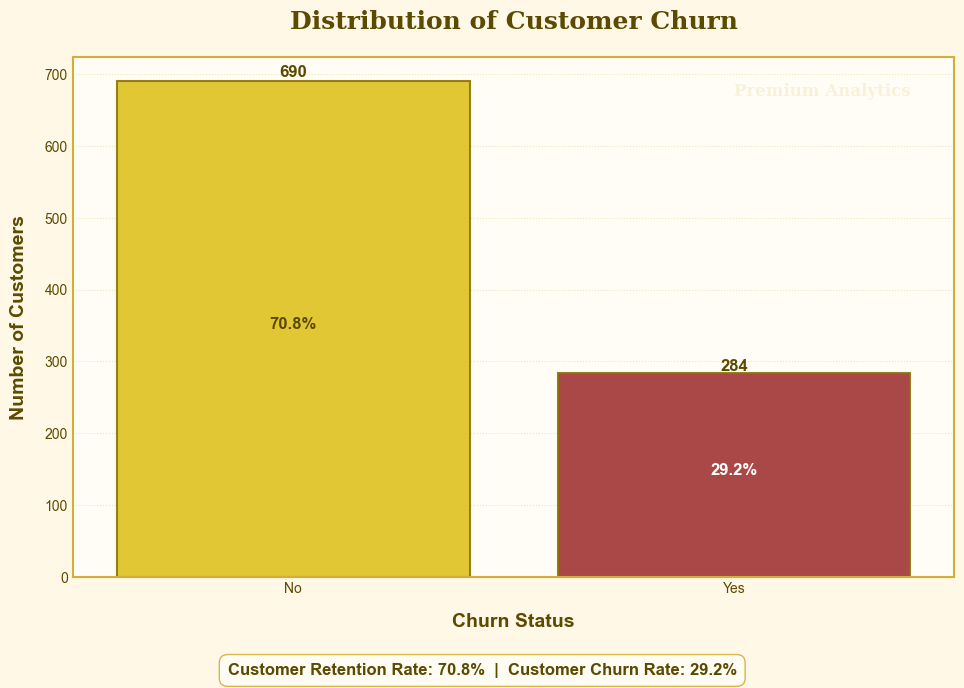

In [58]:
yellow_color = '#FFD700'  # Gold yellow

# 1. Enhanced Churn Distribution
plt.figure(figsize=(10, 7), facecolor='#FFF8E7')  # Warm ivory background

# Get churn counts
churn_counts = mc['Customer Churn Status'].value_counts()

# Create custom color palette - using gold variations
churn_colors = ['#FFD700', '#B22222']  # Gold for No, Crimson for Yes

# Create bar plot with enhanced styling
ax = sns.barplot(
    x=churn_counts.index, 
    y=churn_counts.values, 
    palette=churn_colors,
    edgecolor='#8B7500',  # Dark gold edge
    linewidth=1.5,
    alpha=0.9
)

# Add value labels on top of bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height + height*0.01,
        f'{int(height):,}',  # Format with thousand separator
        ha="center",
        fontweight='bold',
        color='#5C4A00',
        fontsize=12
    )

# Add percentage labels inside bars
total = churn_counts.sum()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percentage = height / total * 100
    ax.text(
        p.get_x() + p.get_width()/2.,
        height/2,
        f'{percentage:.1f}%',
        ha="center",
        fontweight='bold',
        color='white' if i == 1 else '#5C4A00',  # Different color for readability
        fontsize=12
    )

# Enhanced title
plt.title(
    "Distribution of Customer Churn",
    fontsize=18,
    fontweight='bold',
    pad=20,
    color='#5C4A00',
    fontfamily='serif'
)

# Enhanced axis labels
plt.xlabel(
    "Churn Status",
    fontsize=14,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=12
)

plt.ylabel(
    "Number of Customers",
    fontsize=14,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=12
)

# Custom grid and background
ax.set_facecolor('#FFFDF6')  # Very light gold tint
ax.grid(
    True,
    axis='y',
    linestyle=':',
    linewidth=0.8,
    color='#D4AF37',
    alpha=0.3
)

# Gold-themed spines and ticks
for spine in ax.spines.values():
    spine.set_color('#D4AF37')
    spine.set_linewidth(1.5)
    
ax.tick_params(axis='both', colors='#5C4A00')

# Add elegant watermark
plt.text(
    0.95, 0.95,
    "Premium Analytics",
    transform=ax.transAxes,
    fontsize=12,
    color='#D4AF37',
    alpha=0.15,
    ha='right',
    va='top',
    rotation=0,
    fontweight='bold',
    fontfamily='serif'
)

# Add retention/churn rate summary
retained = churn_counts.get('No', 0)
churned = churn_counts.get('Yes', 0)
retention_rate = retained / (retained + churned) * 100
churn_rate = churned / (retained + churned) * 100

# Add text box with summary stats
plt.figtext(
    0.5, 0.01,
    f"Customer Retention Rate: {retention_rate:.1f}%  |  Customer Churn Rate: {churn_rate:.1f}%",
    ha='center',
    fontsize=12,
    fontweight='bold',
    color='#5C4A00',
    bbox=dict(facecolor='#FFFDF6', edgecolor='#D4AF37', boxstyle='round,pad=0.5', alpha=0.9)
)

# Format y-axis with thousand separators
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout(pad=2)
plt.subplots_adjust(bottom=0.15)  # Make room for the summary text
plt.show()

*Customer Satisfaction analysis.*

C:\Users\USER\AppData\Local\Temp\ipykernel_9364\1688736642.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\USER\AppData\Local\Temp\ipykernel_9364\1688736642.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




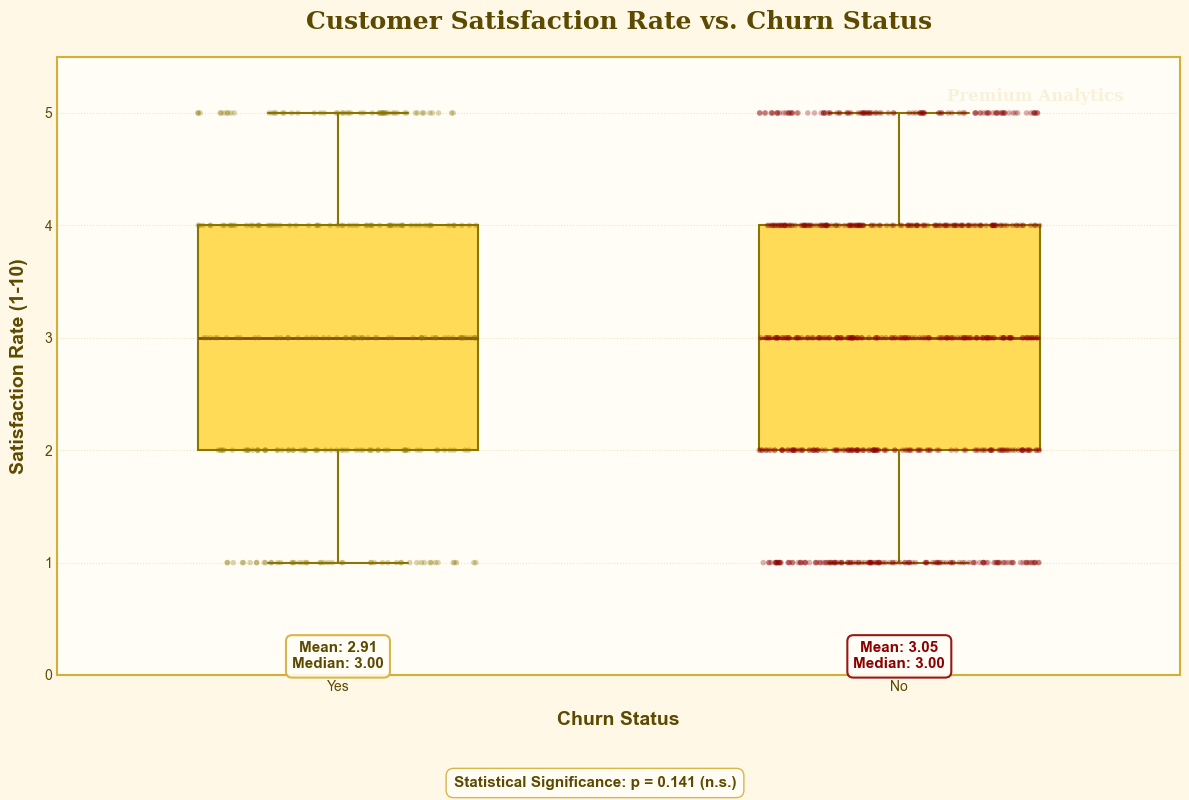

In [59]:
yellow_color = '#FFD700'  # Gold yellow

# 3. Enhanced Customer Satisfaction Analysis
plt.figure(figsize=(12, 8), facecolor='#FFF8E7')  # Warm ivory background

# Create custom color palette - using gold variations
churn_colors = ['#FFD700', '#B22222']  # Gold for No, Crimson for Yes

# Create enhanced boxplot with refined styling
ax = sns.boxplot(
    x='Customer Churn Status', 
    y='Satisfaction Rate', 
    data=mc, 
    palette=churn_colors,
    width=0.5,  # Slightly narrower boxes
    linewidth=1.5,
    fliersize=5,  # Outlier point size
    flierprops={'marker':'o', 'markerfacecolor':'#D4AF37', 'markeredgecolor':'#8B7500'},  # Gold outliers
    medianprops={'color': '#8B4513', 'linewidth': 2},  # Dark brown median line
    boxprops={'edgecolor': '#8B7500', 'facecolor': '#FFDB58'},  # Box styling
    whiskerprops={'color': '#8B7500', 'linewidth': 1.5},  # Whisker styling
    capprops={'color': '#8B7500', 'linewidth': 1.5}  # Cap styling
)

# Add stripplot for individual data points
sns.stripplot(
    x='Customer Churn Status', 
    y='Satisfaction Rate', 
    data=mc,
    alpha=0.3,
    jitter=0.25,
    size=4,
    palette=['#8B7500', '#8B0000'],  # Darker versions of the box colors
    edgecolor='none',
    linewidth=0
)

# Enhanced title
plt.title(
    "Customer Satisfaction Rate vs. Churn Status",
    fontsize=18,
    fontweight='bold',
    pad=20,
    color='#5C4A00',
    fontfamily='serif'
)

# Enhanced axis labels
plt.xlabel(
    "Churn Status",
    fontsize=14,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=12
)

plt.ylabel(
    "Satisfaction Rate (1-10)",
    fontsize=14,
    fontweight='semibold',
    color='#5C4A00',
    labelpad=12
)

# Custom grid and background
ax.set_facecolor('#FFFDF6')  # Very light gold tint
ax.grid(
    True,
    axis='y',
    linestyle=':',
    linewidth=0.8,
    color='#D4AF37',
    alpha=0.3
)

# Gold-themed spines and ticks
for spine in ax.spines.values():
    spine.set_color('#D4AF37')
    spine.set_linewidth(1.5)
    
ax.tick_params(axis='both', colors='#5C4A00')

# Add elegant watermark
plt.text(
    0.95, 0.95,
    "Premium Analytics",
    transform=ax.transAxes,
    fontsize=12,
    color='#D4AF37',
    alpha=0.15,
    ha='right',
    va='top',
    rotation=0,
    fontweight='bold',
    fontfamily='serif'
)

# Add annotations with summary statistics
for i, status in enumerate(['No', 'Yes']):
    subset = mc[mc['Customer Churn Status'] == status]
    mean_val = subset['Satisfaction Rate'].mean()
    median_val = subset['Satisfaction Rate'].median()
    
    # Create annotation text
    stat_text = f"Mean: {mean_val:.2f}\nMedian: {median_val:.2f}"
    
    # Set background color based on churn status
    bg_color = '#FFFDF6'
    border_color = '#D4AF37' if status == 'No' else '#8B0000'
    text_color = '#5C4A00' if status == 'No' else '#8B0000'
    
    # Add annotation
    plt.annotate(
        stat_text,
        xy=(i, subset['Satisfaction Rate'].min()),  # Position near the bottom
        xytext=(i, subset['Satisfaction Rate'].min() - 0.7),  # Offset downward
        ha='center',
        va='top',
        fontsize=11,
        fontweight='bold',
        color=text_color,
        bbox=dict(
            boxstyle="round,pad=0.4", 
            fc=bg_color, 
            ec=border_color, 
            alpha=0.9,
            linewidth=1.5
        )
    )

# Add statistical significance test
from scipy import stats
group1 = mc[mc['Customer Churn Status'] == 'No']['Satisfaction Rate']
group2 = mc[mc['Customer Churn Status'] == 'Yes']['Satisfaction Rate']
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

# Format p-value with stars for significance
if p_value < 0.001:
    sig_text = "p < 0.001 ***"
elif p_value < 0.01:
    sig_text = f"p = {p_value:.3f} **"
elif p_value < 0.05:
    sig_text = f"p = {p_value:.3f} *"
else:
    sig_text = f"p = {p_value:.3f} (n.s.)"

# Add p-value annotation
plt.figtext(
    0.5, 0.01,
    f"Statistical Significance: {sig_text}",
    ha='center',
    fontsize=11,
    fontweight='bold',
    color='#5C4A00',
    bbox=dict(
        facecolor='#FFFDF6', 
        edgecolor='#D4AF37', 
        boxstyle='round,pad=0.5', 
        alpha=0.9
    )
)

# Ensure y-axis starts near zero for proper perspective
y_min = max(0, mc['Satisfaction Rate'].min() - 1)
y_max = min(10, mc['Satisfaction Rate'].max() + 0.5)
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for the summary text
plt.show()

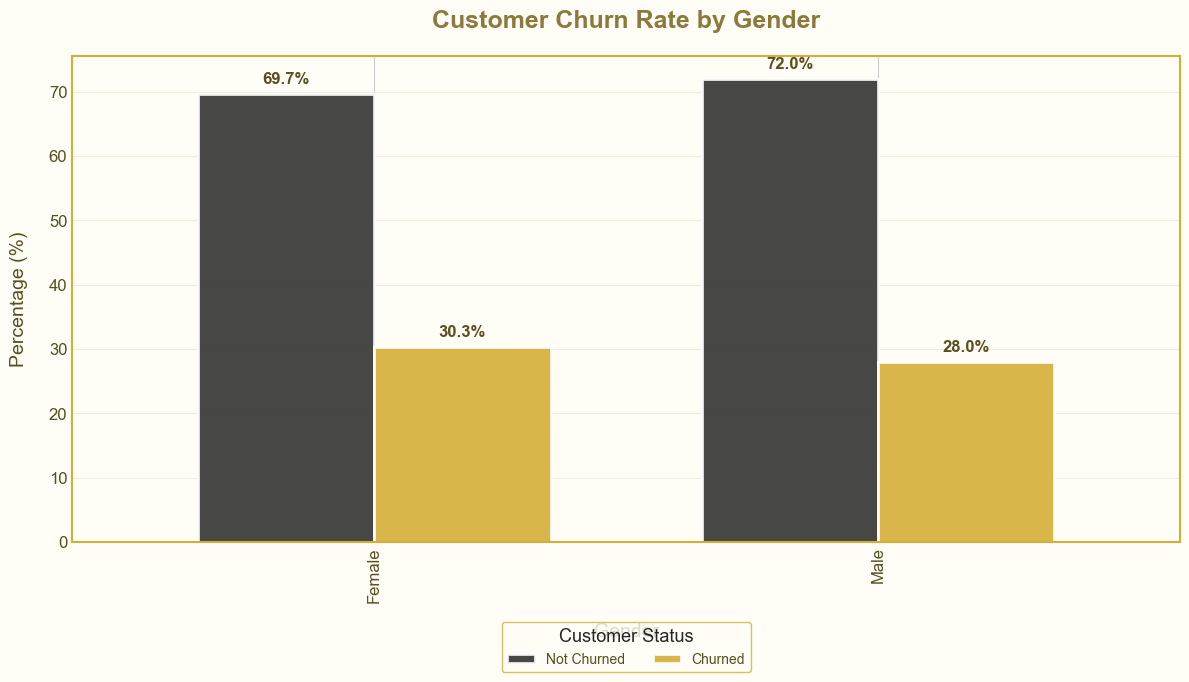

In [60]:
# Set up the visualization with only one output
plt.style.use('seaborn-v0_8-whitegrid')

# Gold-themed color scheme
gold_palette = ["#D4AF37", "#FFD700"]
sns.set_palette(gold_palette)

# Define colors
churned_color = '#D4AF37'  # Rich gold
not_churned_color = '#333333'  # Dark contrast
background_color = '#FFFDF6'  # Warm off-white

# Create figure
fig, ax = plt.subplots(figsize=(12, 7))
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Calculate data
gender_churn = pd.crosstab(mc['Gender'], mc['Customer Churn Status'])
gender_churn_percentage = gender_churn.div(gender_churn.sum(1), axis=0) * 100

# Plot bars
bars = gender_churn_percentage.plot(
    kind='bar',
    stacked=False,
    color=[not_churned_color, churned_color],
    width=0.7,
    edgecolor='white',
    linewidth=2,
    alpha=0.9,
    ax=ax
)

# Customize appearance
ax.set_title('Customer Churn Rate by Gender', 
            fontsize=18, 
            fontweight='bold', 
            pad=20,
            color='#8C7A3D')
ax.set_xlabel('Gender', fontsize=14, labelpad=15, color='#5A4F21')
ax.set_ylabel('Percentage (%)', fontsize=14, labelpad=15, color='#5A4F21')
ax.tick_params(axis='both', colors='#5A4F21', labelsize=12)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, 
                fmt='%.1f%%', 
                fontsize=12, 
                fontweight='bold', 
                padding=5,
                color='#5A4F21')

# Grid and frame styling
ax.grid(axis='y', color='#EDE8D5', linestyle='-', alpha=0.7)
for spine in ax.spines.values():
    spine.set_color('#D4AF37')
    spine.set_linewidth(1.5)

# Legend styling
legend = ax.legend(
    ['Not Churned', 'Churned'],
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=True,
    edgecolor='#D4AF37',
    facecolor=background_color,
    title='Customer Status',
    title_fontsize=13
)
for text in legend.get_texts():
    text.set_color('#5A4F21')

# Tight layout and single display
plt.tight_layout()
plt.show()

# Insight: More female churned customers at 30.3%

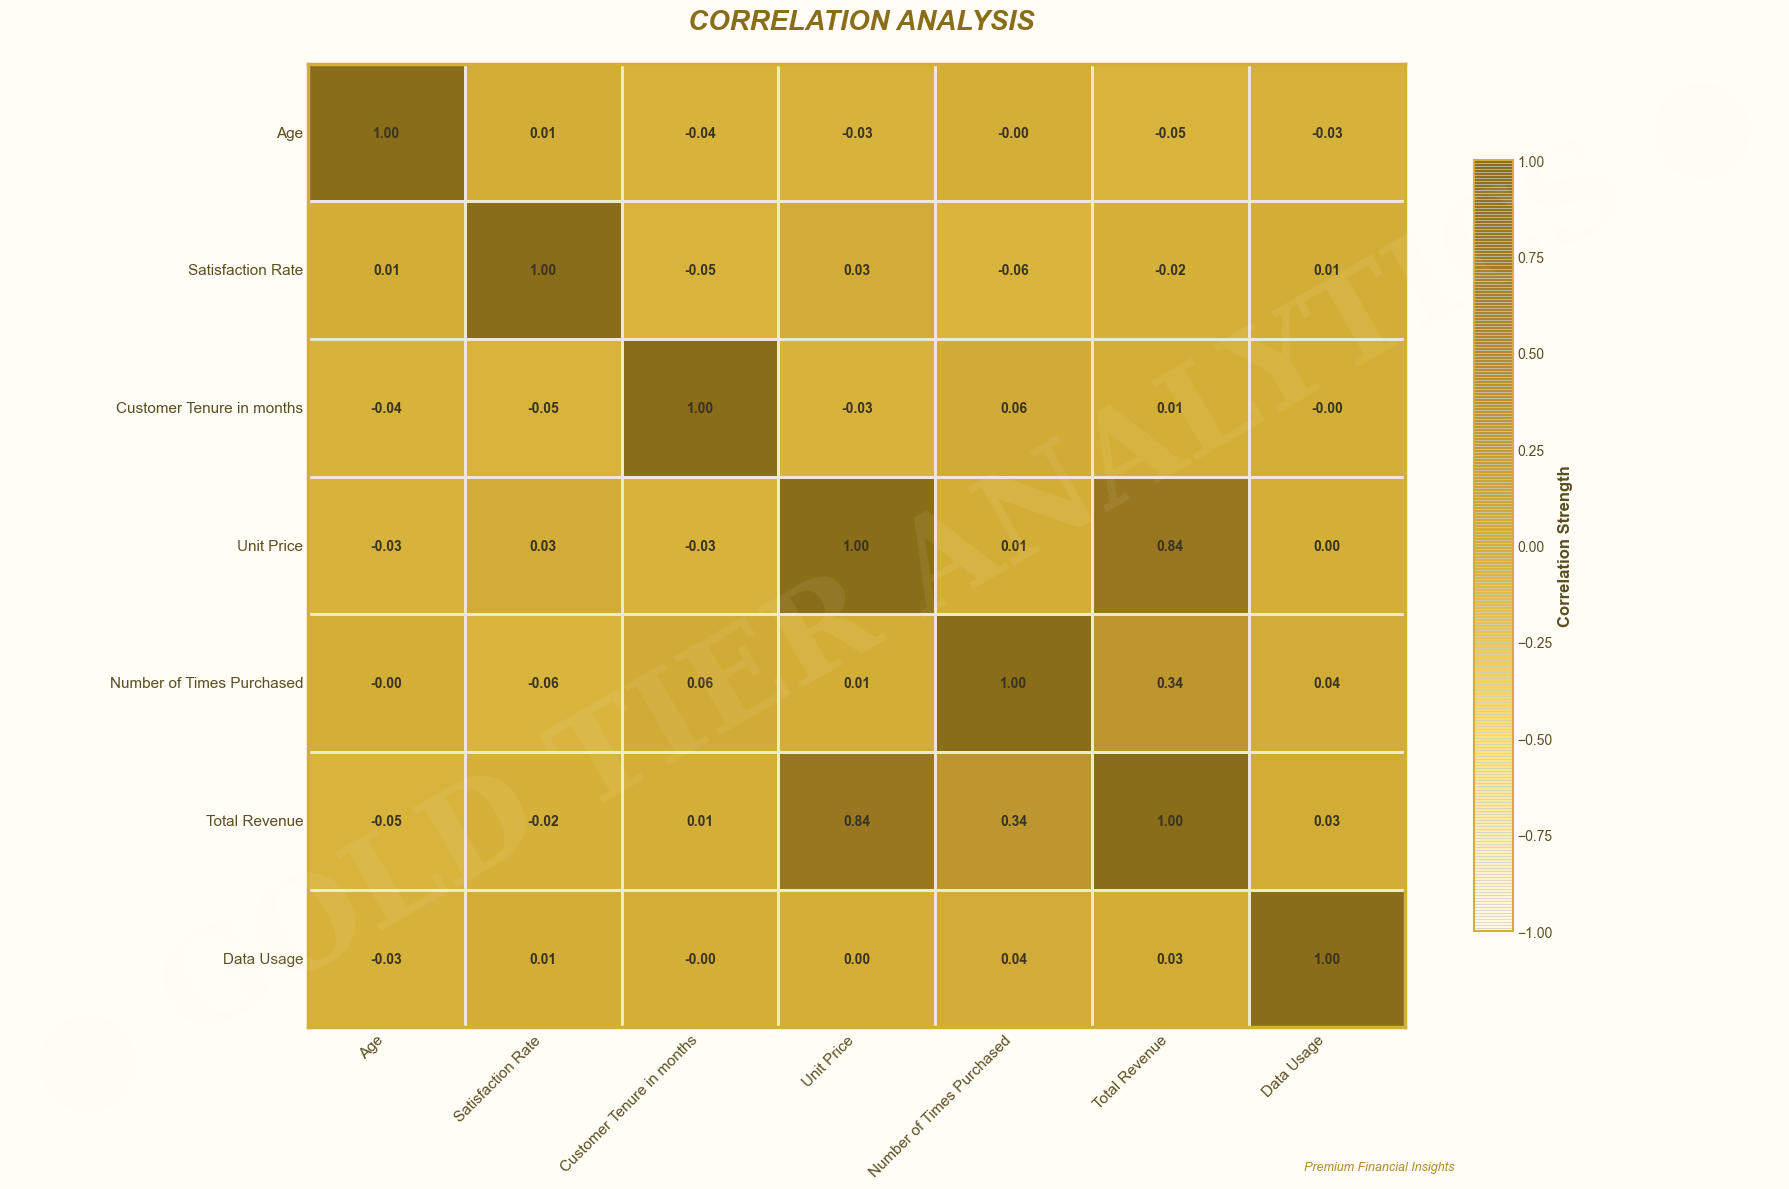

In [61]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Set up the gold-themed correlation matrix
plt.figure(figsize=(16, 12), facecolor='#FFFDF6')

# Create luxurious gold colormap
gold_cmap = LinearSegmentedColormap.from_list(
    'luxury_gold', 
    ['#FFF9E6', '#FFE175', '#D4AF37', '#B38B2D', '#8A6D19'], 
    N=256
)

# Calculate correlations
numerical_columns = mc.select_dtypes(include=['int64', 'float64']).columns
correlation = mc[numerical_columns].corr()

# Create heatmap with premium styling
ax = sns.heatmap(
    correlation, 
    annot=True, 
    cmap=gold_cmap,
    center=0,
    fmt='.2f',
    annot_kws={
        'fontsize': 10,
        'fontweight': 'bold',
        'color': '#3A3320'  # Darker gold for better contrast
    },
    linewidths=0.75,
    linecolor='#EDE8D5',
    cbar_kws={
        'shrink': 0.8,
        'label': 'Correlation Strength',
        'drawedges': True,
        'spacing': 'proportional'
    },
    vmin=-1,
    vmax=1
)

# Enhance colorbar
cbar = ax.collections[0].colorbar
cbar.outline.set_edgecolor('#D4AF37')
cbar.outline.set_linewidth(1.5)
cbar.ax.tick_params(color='#5A4F21', labelcolor='#5A4F21', labelsize=10)
cbar.ax.yaxis.label.set_color('#5A4F21')
cbar.ax.yaxis.label.set_fontsize(12)
cbar.ax.yaxis.label.set_fontweight('bold')

# Premium title styling
plt.title(
    ' CORRELATION ANALYSIS', 
    fontsize=20, 
    pad=25,
    fontweight='bold',
    color='#8A6D19',
    loc='center',
    style='italic'
)

# Axis label styling
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    fontsize=11,
    color='#5A4F21'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=11,
    color='#5A4F21'
)

# Add luxury border
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('#D4AF37')
    spine.set_linewidth(2.5)

# Add subtle grid pattern
ax.set_xticks([x + 0.5 for x in range(len(numerical_columns))], minor=True)
ax.set_yticks([y + 0.5 for y in range(len(numerical_columns))], minor=True)
ax.grid(which='minor', color='#F5E8C7', linestyle='-', linewidth=0.75, alpha=0.7)

# Add elegant watermark
plt.figtext(
    0.5, 0.5, 
    "● GOLD TIER ANALYTICS ●", 
    fontsize=90, 
    color='#FFF5D1', 
    alpha=0.08, 
    rotation=30,
    ha='center',
    va='center',
    fontweight='bold',
    fontfamily='serif'
)

# Add signature
plt.figtext(
    0.85, 0.02, 
    "Premium Financial Insights", 
    fontsize=9, 
    color='#B38B2D',
    style='italic',
    ha='right'
)

plt.tight_layout()
plt.show()

In [62]:
# Average revenue analysis
avg_revenue = mc.groupby('Customer Churn Status')['Total Revenue'].mean()
print(f"\nAverage Revenue for Churned Customers: ₦{avg_revenue[1]:.2f}")
print(f"Average Revenue for Retained Customers: ₦{avg_revenue[0]:.2f}")
print(f"Revenue Difference: ₦{avg_revenue[0] - avg_revenue[1]:.2f}")

# Customer Lifetime Value (CLV) analysis
mc['CLV'] = mc['Total Revenue'] * mc['Customer Tenure in months']
avg_clv = mc.groupby('Customer Churn Status')['CLV'].mean()
print(f"\nAverage CLV for Churned Customers: ₦{avg_clv[1]:.2f}")
print(f"Average CLV for Retained Customers: ₦{avg_clv[0]:.2f}")


Average Revenue for Churned Customers: ₦204226.06
Average Revenue for Retained Customers: ₦204852.17
Revenue Difference: ₦626.12

Average CLV for Churned Customers: ₦7065421.65
Average CLV for Retained Customers: ₦6214281.67


C:\Users\USER\AppData\Local\Temp\ipykernel_9364\3338203175.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\USER\AppData\Local\Temp\ipykernel_9364\3338203175.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\USER\AppData\Local\Temp\ipykernel_9364\3338203175.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\USER\AppData\Local\Temp\ipykernel_9364\3338203175.py:10: FutureWarning:

Series.__getitem__ tr

In [63]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# ============================================================================
# PART 0: DATA PREPROCESSING - FIX DATETIME ISSUE
# ============================================================================
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

# Convert 'Date of Purchase' to datetime format
print("Converting 'Date of Purchase' to datetime format...")

# Convert Month-Year format (like Jan-25) to datetime
try:
    mc['Date of Purchase'] = pd.to_datetime(mc['Date of Purchase'], format='%b-%y')
    print("✅ Successfully converted using Month-Year format (e.g., Jan-25)")
except Exception as e:
    print(f"❌ Error converting datetime: {e}")
    print("Please check your date format and adjust accordingly")
    raise

print(f"New data type: {mc['Date of Purchase'].dtype}")
print(f"Date range: {mc['Date of Purchase'].min()} to {mc['Date of Purchase'].max()}")

# ============================================================================
# PART 1: REVENUE ANALYSIS BY MONTHS
# ============================================================================
print("\n" + "="*60)
print("REVENUE ANALYSIS BY MONTHS")
print("="*60)

# Extract month and year information
mc['Purchase_Month'] = mc['Date of Purchase'].dt.month
mc['Purchase_Year'] = mc['Date of Purchase'].dt.year
mc['Month_Year'] = mc['Date of Purchase'].dt.to_period('M')

# Calculate monthly revenue
monthly_revenue = mc.groupby('Month_Year')['Total Revenue'].agg(['sum', 'count', 'mean']).reset_index()
monthly_revenue.columns = ['Month_Year', 'Total_Revenue', 'Customer_Count', 'Avg_Revenue_Per_Customer']
monthly_revenue['Month_Year_str'] = monthly_revenue['Month_Year'].astype(str)

print("Monthly Revenue Summary:")
print(monthly_revenue)

# Define beautiful gold color palette
gold_colors = {
    'primary_gold': '#FFD700',
    'deep_gold': '#B8860B',
    'light_gold': '#FFEF94',
    'dark_gold': '#DAA520',
    'bronze_gold': '#CD7F32',
    'champagne': '#F7E7CE',
    'amber': '#FFBF00',
    'sunset_gold': '#FFA500'
}

# Create stunning interactive revenue visualization
fig_revenue = make_subplots(
    rows=2, cols=2,
    subplot_titles=('✨ Monthly Total Revenue', '👥 Monthly Customer Count', 
                   '💰 Average Revenue per Customer', '📊 Revenue by Churn Status'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]],
    horizontal_spacing=0.12,
    vertical_spacing=0.15
)

# Total Revenue by Month - Elegant gold line with glow effect
fig_revenue.add_trace(
    go.Scatter(x=monthly_revenue['Month_Year_str'], 
              y=monthly_revenue['Total_Revenue'],
              mode='lines+markers',
              name='💎 Total Revenue',
              line=dict(color=gold_colors['primary_gold'], width=4, shape='spline'),
              marker=dict(
                  size=12,
                  color=gold_colors['deep_gold'],
                  line=dict(color='white', width=2),
                  symbol='diamond'
              ),
              fill='tonexty',
              fillcolor='rgba(255, 215, 0, 0.1)',
              hovertemplate='<b>%{x}</b><br>Revenue: ₦%{y:,.0f}<extra></extra>'),
    row=1, col=1
)

# Customer Count by Month - Gradient gold bars
fig_revenue.add_trace(
    go.Bar(x=monthly_revenue['Month_Year_str'], 
           y=monthly_revenue['Customer_Count'],
           name='👑 Customer Count',
           marker=dict(
               color=monthly_revenue['Customer_Count'],
               colorscale=[[0, gold_colors['champagne']], 
                          [0.5, gold_colors['amber']], 
                          [1, gold_colors['deep_gold']]], 
               line=dict(color=gold_colors['dark_gold'], width=1.5),
               opacity=0.8
           ),
           hovertemplate='<b>%{x}</b><br>Customers: %{y:,.0f}<extra></extra>'),
    row=1, col=2
)

# Average Revenue per Customer - Sophisticated gold curve
fig_revenue.add_trace(
    go.Scatter(x=monthly_revenue['Month_Year_str'], 
              y=monthly_revenue['Avg_Revenue_Per_Customer'],
              mode='lines+markers',
              name='⭐ Avg Revenue/Customer',
              line=dict(color=gold_colors['sunset_gold'], width=4, shape='spline'),
              marker=dict(
                  size=10,
                  color=gold_colors['bronze_gold'],
                  line=dict(color='white', width=2),
                  symbol='star'
              ),
              fill='tozeroy',
              fillcolor='rgba(255, 191, 0, 0.15)',
              hovertemplate='<b>%{x}</b><br>Avg Revenue: ₦%{y:,.2f}<extra></extra>'),
    row=2, col=1
)

# Revenue by Churn Status - Multi-tone gold bars
if 'Customer Churn Status' in mc.columns:
    churn_revenue = mc.groupby(['Month_Year', 'Customer Churn Status'])['Total Revenue'].sum().reset_index()
    churn_revenue['Month_Year_str'] = churn_revenue['Month_Year'].astype(str)

    churn_colors = [gold_colors['primary_gold'], gold_colors['deep_gold'], 
                    gold_colors['bronze_gold'], gold_colors['amber']]

    for i, status in enumerate(churn_revenue['Customer Churn Status'].unique()):
        data = churn_revenue[churn_revenue['Customer Churn Status'] == status]
        fig_revenue.add_trace(
            go.Bar(x=data['Month_Year_str'], 
                   y=data['Total Revenue'],
                   name=f'🏆 {status}',
                   marker=dict(
                       color=churn_colors[i % len(churn_colors)],
                       line=dict(color='white', width=1.5),
                       opacity=0.85
                   ),
                   hovertemplate=f'<b>%{{x}}</b><br>{status}: ₦%{{y:,.0f}}<extra></extra>'),
            row=2, col=2
        )
else:
    print("⚠️  'Customer Churn Status' column not found. Skipping churn analysis.")
    fig_revenue.add_trace(
        go.Bar(x=monthly_revenue['Month_Year_str'], 
               y=monthly_revenue['Total_Revenue'],
               name='📊 Monthly Revenue',
               marker=dict(
                   color=gold_colors['primary_gold'],
                   line=dict(color='white', width=1.5),
                   opacity=0.85
               ),
               hovertemplate='<b>%{x}</b><br>Revenue: ₦%{y:,.0f}<extra></extra>'),
        row=2, col=2
    )

# Update layout with luxurious gold theme
fig_revenue.update_layout(
    height=900,
    title={
        'text': " MTN PREMIUM REVENUE ANALYTICS DASHBOARD ",
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'color': gold_colors['deep_gold'], 'family': 'Arial Black'}
    },
    plot_bgcolor='rgba(247, 231, 206, 0.1)',
    paper_bgcolor='white',
    font={'color': gold_colors['dark_gold'], 'size': 12, 'family': 'Arial'},
    showlegend=True,
    legend={
        'orientation': 'h',
        'yanchor': 'bottom',
        'y': -0.15,
        'xanchor': 'center',
        'x': 0.5,
        'bgcolor': 'rgba(255, 215, 0, 0.1)',
        'bordercolor': gold_colors['dark_gold'],
        'borderwidth': 1,
        'font': {'size': 11, 'color': gold_colors['deep_gold']}
    },
    margin=dict(t=80, l=60, r=60, b=100)
)

# Style all subplots with gold theme
for i in range(1, 3):
    for j in range(1, 3):
        fig_revenue.update_xaxes(
            tickangle=45, 
            showgrid=True, 
            gridcolor='rgba(218, 165, 32, 0.2)',
            showline=True,
            linecolor=gold_colors['dark_gold'],
            linewidth=2,
            tickfont={'color': gold_colors['deep_gold'], 'size': 10},
            row=i, col=j
        )
        fig_revenue.update_yaxes(
            showgrid=True, 
            gridcolor='rgba(218, 165, 32, 0.2)',
            showline=True,
            linecolor=gold_colors['dark_gold'],
            linewidth=2,
            tickfont={'color': gold_colors['deep_gold'], 'size': 10},
            row=i, col=j
        )

# Add subtle background pattern
fig_revenue.add_shape(
    type="rect",
    xref="paper", yref="paper",
    x0=0, y0=0, x1=1, y1=1,
    fillcolor="rgba(255, 215, 0, 0.02)",
    line=dict(width=0),
    layer="below"
)

# Show the plot
fig_revenue.show()

# Revenue insights
total_revenue = mc['Total Revenue'].sum()
avg_monthly_revenue = monthly_revenue['Total_Revenue'].mean()
peak_month = monthly_revenue.loc[monthly_revenue['Total_Revenue'].idxmax(), 'Month_Year_str']
peak_revenue = monthly_revenue['Total_Revenue'].max()

print(f"\n🌟 ═══════════════════════════════════════════ 🌟")
print(f"   ✨ PREMIUM REVENUE INSIGHTS DASHBOARD ✨   ")
print(f"🌟 ═══════════════════════════════════════════ 🌟")
print(f"💰 Total Revenue: ₦{total_revenue:,.2f}")
print(f"📊 Average Monthly Revenue: ₦{avg_monthly_revenue:,.2f}")
print(f"🏆 Peak Revenue Month: {peak_month} (₦{peak_revenue:,.2f})")

# Additional insights
lowest_month = monthly_revenue.loc[monthly_revenue['Total_Revenue'].idxmin(), 'Month_Year_str']
lowest_revenue = monthly_revenue['Total_Revenue'].min()
revenue_std = monthly_revenue['Total_Revenue'].std()

print(f"📉 Lowest Revenue Month: {lowest_month} (₦{lowest_revenue:,.2f})")
print(f"📈 Revenue Volatility: ₦{revenue_std:,.2f}")
print(f"🚀 Revenue Growth Potential: {((peak_revenue - lowest_revenue) / lowest_revenue * 100):.2f}%")

# Monthly trends with premium styling
print(f"\n💎 ═══════════════════════════════════════════ 💎")
print(f"        🎯 STRATEGIC MONTHLY INSIGHTS 🎯        ")
print(f"💎 ═══════════════════════════════════════════ 💎")
print(f"📅 Analysis Period: {len(monthly_revenue)} months")
print(f"👥 Average Monthly Customers: {monthly_revenue['Customer_Count'].mean():.0f}")
print(f"⭐ Peak Customer Month: {monthly_revenue.loc[monthly_revenue['Customer_Count'].idxmax(), 'Month_Year_str']}")
print(f"💵 Global ARPU: ₦{monthly_revenue['Avg_Revenue_Per_Customer'].mean():.2f}")

# Performance indicators
revenue_trend = "🔥 ASCENDING" if peak_revenue > lowest_revenue else "📉 DECLINING"
customer_stability = "🎯 STABLE" if monthly_revenue['Customer_Count'].std() < monthly_revenue['Customer_Count'].mean() * 0.2 else "⚡ VOLATILE"

print(f"\n🔍 ═══════════════════════════════════════════ 🔍")
print(f"        📊 PERFORMANCE INDICATORS 📊           ")
print(f"🔍 ═══════════════════════════════════════════ 🔍")
print(f"📈 Revenue Trend: {revenue_trend}")
print(f"👥 Customer Base: {customer_stability}")
print(f"💡 Business Health: {'🟢 EXCELLENT' if avg_monthly_revenue > 10000000 else '🟡 GOOD' if avg_monthly_revenue > 5000000 else '🔴 NEEDS ATTENTION'}")
print(f"🌟 ═══════════════════════════════════════════ 🌟")


DATA PREPROCESSING
Converting 'Date of Purchase' to datetime format...
✅ Successfully converted using Month-Year format (e.g., Jan-25)
New data type: datetime64[ns]
Date range: 2025-01-01 00:00:00 to 2025-03-01 00:00:00

REVENUE ANALYSIS BY MONTHS
Monthly Revenue Summary:
  Month_Year  Total_Revenue  Customer_Count  Avg_Revenue_Per_Customer  \
0    2025-01       63366500             271             233824.723247   
1    2025-02       87173550             450             193719.000000   
2    2025-03       48808150             253             192917.588933   

  Month_Year_str  
0        2025-01  
1        2025-02  
2        2025-03  



🌟 ═══════════════════════════════════════════ 🌟
   ✨ PREMIUM REVENUE INSIGHTS DASHBOARD ✨   
🌟 ═══════════════════════════════════════════ 🌟
💰 Total Revenue: ₦199,348,200.00
📊 Average Monthly Revenue: ₦66,449,400.00
🏆 Peak Revenue Month: 2025-02 (₦87,173,550.00)
📉 Lowest Revenue Month: 2025-03 (₦48,808,150.00)
📈 Revenue Volatility: ₦19,367,606.55
🚀 Revenue Growth Potential: 78.60%

💎 ═══════════════════════════════════════════ 💎
        🎯 STRATEGIC MONTHLY INSIGHTS 🎯        
💎 ═══════════════════════════════════════════ 💎
📅 Analysis Period: 3 months
👥 Average Monthly Customers: 325
⭐ Peak Customer Month: 2025-02
💵 Global ARPU: ₦206820.44

🔍 ═══════════════════════════════════════════ 🔍
        📊 PERFORMANCE INDICATORS 📊           
🔍 ═══════════════════════════════════════════ 🔍
📈 Revenue Trend: 🔥 ASCENDING
👥 Customer Base: ⚡ VOLATILE
💡 Business Health: 🟢 EXCELLENT
🌟 ═══════════════════════════════════════════ 🌟


# PREDICTING CUSTOMER CHURN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load data
mc = pd.read_csv("mtn_customer_churn.csv")

# 1. Data Preparation =

# Convert target to binary (handle various string formats)
churn_mapping = {
    'Yes': 1, 'yes': 1, 'Churned': 1, 'True': 1, 'true': 1,
    'No': 0, 'no': 0, 'Active': 0, 'False': 0, 'false': 0
}
mc['Churn'] = mc['Customer Churn Status'].map(churn_mapping).fillna(0).astype(int)

# Verify target conversion
print("Target distribution:")
print(mc['Churn'].value_counts())




# 2. Feature Engineering 

# Handle missing values
numeric_features = ['Age', 'Customer Tenure in months', 'Unit Price',
                   'Number of Times Purchased', 'Total Revenue', 'Data Usage']

categorical_features = ['State', 'MTN Device', 'Gender',
                       'Subscription Plan', 'Reasons for Churn']

# Create derived features safely
mc['Revenue_per_Purchase'] = mc['Total Revenue'] / mc['Number of Times Purchased'].replace(0, 1)
mc['Data_Usage_per_Month'] = mc['Data Usage'] / mc['Customer Tenure in months'].replace(0, 1)

# Add new features to numeric features list
numeric_features.extend(['Revenue_per_Purchase', 'Data_Usage_per_Month'])



# 3. Train-Test Split 

X = mc.drop(['Customer Churn Status', 'Churn'], axis=1)
y = mc['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)



# 4. Pipeline Construction 

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])


# 5. Model Training & Evaluation 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print(classification_report(y_test, y_pred))

# Optional: Get feature names after transformation
preprocessor.fit(X_train)
onehot_columns = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(onehot_columns)
print("\nFeature names:", all_feature_names)

Target distribution:
Churn
0    690
1    284
Name: count, dtype: int64

Model Evaluation:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       208
           1       1.00      0.82      0.90        85

    accuracy                           0.95       293
   macro avg       0.97      0.91      0.93       293
weighted avg       0.95      0.95      0.95       293


Feature names: ['Age', 'Customer Tenure in months', 'Unit Price', 'Number of Times Purchased', 'Total Revenue', 'Data Usage', 'Revenue_per_Purchase', 'Data_Usage_per_Month', 'State_Abia', 'State_Abuja (FCT)', 'State_Adamawa', 'State_Akwa Ibom', 'State_Anambra', 'State_Bauchi', 'State_Bayelsa', 'State_Benue', 'State_Borno', 'State_Cross River', 'State_Delta', 'State_Edo', 'State_Ekiti', 'State_Enugu', 'State_Gombe', 'State_Imo', 'State_Jigawa', 'State_Kaduna', 'State_Kano', 'State_Katsina', 'State_Kebbi', 'State_Kogi', 'State_Kwara', 'State_Lagos', 'State_Nasarawa', 'State_Nig

# STRATEGIC RECOMMENDATIONS FROM THE ANALYSIS ABOVE.

1. Pricing & Product Strategy

Revise High-Churn Plans

Redesign the 65GB Monthly and 30GB Broadband plans with:

▪ Competitive pricing tiers (e.g., loyalty discounts for tenure >12 months)

▪ Bundled value-adds (free weekend data/SMS)

Test: Introduce mid-tier 45GB plan as alternative to 65GB

Dynamic Pricing for Long-Tenure Customers

Implement tenure-based pricing (e.g., -5% tariff after 2 years)

Mitigate: High call tariffs with "loyalty minutes" (free minutes/month based on tenure)

2. Retention Program (Targeted)

High-Risk Customer Focus

Segment: Females aged 25-40 on high-churn plans

Interventions:

▪ Proactive retention offers at 6/12/18-month tenure milestones

▪ Personalized "Win-back" bundles for those showing churn signals

Tenure Recognition Program

Reward long-tenure customers (>24 months) with:

▪ Annual loyalty bonus (extra data/call minutes)

3. Customer Experience Improvements

Tariff Transparency Toolkit

SMS/App notifications showing:

▪ Cost-saving alternatives based on usage

▪ Interactive tariff calculator

Satisfaction Boosters

For ages 25-35:

▪ Free data top-ups for app-based feedback submissions

▪ "Usage coach" chatbot to optimize plan costs

4. Revenue Protection

At-Risk Revenue Recovery

Priority: Customers contributing to the ₦58M lost revenue

Tactics:

▪ Outbound retention team for high-value churners

▪ Conditional discounts (e.g., 15% off for 3-month commitment)

Churn Early Warning System

Triggers:

▪ Tenure >18 months + price sensitivity signals


5. Gender-Specific Initiatives

Female-Centric Retention

"HerPlan" benefits:

▪ Free safety/SMS bundles

▪ Partner discounts (e.g., 10% off childcare apps)



6. Data-Driven Monitoring

Key Metrics Dashboard

Track weekly:

▪ Churn rate by age bracket/plan type

▪ Revenue impact of retention offers


